# Looking for autocorrelation of SN II LCs 

We want to perform a "smart" interpolation of the data using GP. 
To do so, we would like to estimate the most suitable Kernel. 

What is the Kernel of gaussian processes: 
- it's what determines the predictability of upcoming points, how are two points related to one another. 





https://www.youtube.com/watch?v=ZjaBn93YPWo 
np.corrcoef

Should remove IIb SN from consideration. Maybe analyse them separately. 


What we need is to fit the correlation and understand what is the most appropriate width. Could take the median? Or adapt to each of them? 

Eran: adapt to each of them. TO EACH ITS OWN

How sensitive would we be by changing it?


<b>Methods</b> 

Method number one: go quick and dirty try it out and see 

method number two: how to I estimate my observation noise and follow on what Ofer (Springer) told me.... 

In [1]:
from functions_4_gp import *

In [2]:
%matplotlib notebook

In [3]:
tablepath        = '/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/tables/'
forcedphot_lc    = '/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/case_by_case/lc/'
# forcedphot_maglc = '/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/case_by_case/mag_lc/'


# version which is z and MW extinction corrected
forcedphot_maglc = '/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/sample422/mag_lc_ex_z_corr_2/'

In [4]:
sample_table = ascii.read(tablepath + 'RISNeII_radeczeztexp_30062021.csv', delimiter = ',')

In [20]:
sample_table

<Table length=145>
    name     classification First Detection ...     jd_t_exp       Fs-Texp  
   str12          str6          float64     ...     float64        float64  
------------ -------------- --------------- ... ---------------- -----------
ZTF18aaaibml          SN II     2458881.872 ...     2458881.3965     10.1185
ZTF18aadsuxd          SN II     2459155.965 ... 2459154.01799947  2.92100053
ZTF18aahrzrb          SN II      2458217.74 ... 2458217.58078861 34.23621139
ZTF18aapifti         SN IIP     2458233.678 ... 2458230.83350234 18.88349766
ZTF18aaqkoyr         SN IIP     2458243.685 ... 2458242.77598738  2.90801262
ZTF18aarpttw          SN II     2458246.822 ... 2458246.81176859  2.18823141
ZTF18aatlfus         SN IIP     2458249.858 ...     2458248.8995      6.9245
ZTF18aavpady         SN IIL      2458256.93 ... 2458256.11371529 55.88628471
ZTF18aawyjjq          SN II     2458262.906 ... 2458262.85743461  9.14256539
ZTF18aaxwrjt          SN II      2458273.79 ... 2458273.77680863 70.22319137
         ...            ...             ... ...              ...         ...
ZTF20aciwrpn          SN II      2459136.66 ... 2459135.97088812  3.79711188
ZTF20acjbhhp          SN II      2459136.83 ... 2459136.44503576  3.23996424
ZTF20acklcyp         SN IIn      2459138.75 ...     2459137.7425      7.8705
ZTF20acknpig          SN II     2459140.758 ... 2459139.07313491  1.88786509
ZTF20acocohy          SN II     2459150.897 ... 2459149.95358224  3.86541776
ZTF20acongti          SN II     2459154.691 ... 2459153.62298563  5.22301437
ZTF20acpevli          SN II     2459157.912 ... 2459157.71451219 36.93948781
ZTF20acqexmr          SN II     2459166.914 ... 2459166.90006078  2.82793922
ZTF20actawpa          SN II      2459176.02 ... 2459175.30631293 15.69368707
ZTF20acuaqlf          SN II     2459181.608 ... 2459181.37353528  1.20646472

In [5]:
np.unique(sample_table['classification'])

<Column name='classification' dtype='str6' length=6>
 SN II
SN II?
SN IIL
SN IIP
SN IIb
SN IIn

In [6]:
sample_tab_no2b = sample_table[sample_table['classification']!='SN IIb']
nearby_no2b     = sample_tab_no2b[sample_tab_no2b['redshift']<=0.025]

In [7]:
nearby_no2b

<Table length=34>
    name     classification First Detection ...     jd_t_exp       Fs-Texp  
   str12          str6          float64     ...     float64        float64  
------------ -------------- --------------- ... ---------------- -----------
ZTF18aapifti         SN IIP     2458233.678 ... 2458230.83350234 18.88349766
ZTF18aaqkoyr         SN IIP     2458243.685 ... 2458242.77598738  2.90801262
ZTF18abdbysy         SN IIP     2458295.705 ...  2458294.7239027   1.6760973
ZTF18abokyfk          SN II      2458350.89 ... 2458350.87688315  1.12911685
ZTF18abqyvzy          SN II     2458357.915 ... 2458357.82586669  5.87313331
ZTF18adbmrug          SN II     2458482.699 ... 2458482.40516358  3.04383642
ZTF19aavbjfp          SN II     2458617.706 ...     2458617.2275     18.5685
ZTF19abjrjdw          SN II     2458694.677 ... 2458694.50951287 12.20048713
ZTF19abjsmmv          SN II     2458694.723 ...      2458693.223       7.439
ZTF19abpidqn         SN IIn     2458707.713 ... 2458707.70830449  1.14969551
         ...            ...             ... ...              ...         ...
ZTF20abqwkxs          SN II     2459070.704 ... 2459070.69804624  1.69295376
ZTF20abupxie          SN II      2459080.96 ...      2459080.475       5.525
ZTF20acfdmex          SN II     2459118.848 ... 2459118.84587315  1.71912685
ZTF20acfkyll          SN II     2459119.973 ...     2459119.4955      5.1595
ZTF20acfkzcg          SN II     2459119.973 ...     2459119.4955      2.4135
ZTF20acgided          SN II     2459123.697 ...  2459123.5435129   3.1434871
ZTF20acknpig          SN II     2459140.758 ... 2459139.07313491  1.88786509
ZTF20acqexmr          SN II     2459166.914 ... 2459166.90006078  2.82793922
ZTF20actawpa          SN II      2459176.02 ... 2459175.30631293 15.69368707
ZTF20acuaqlf          SN II     2459181.608 ... 2459181.37353528  1.20646472

## Retrying to perform the autocorrelaiton with the real time lags this time

<IPython.core.display.Javascript object>


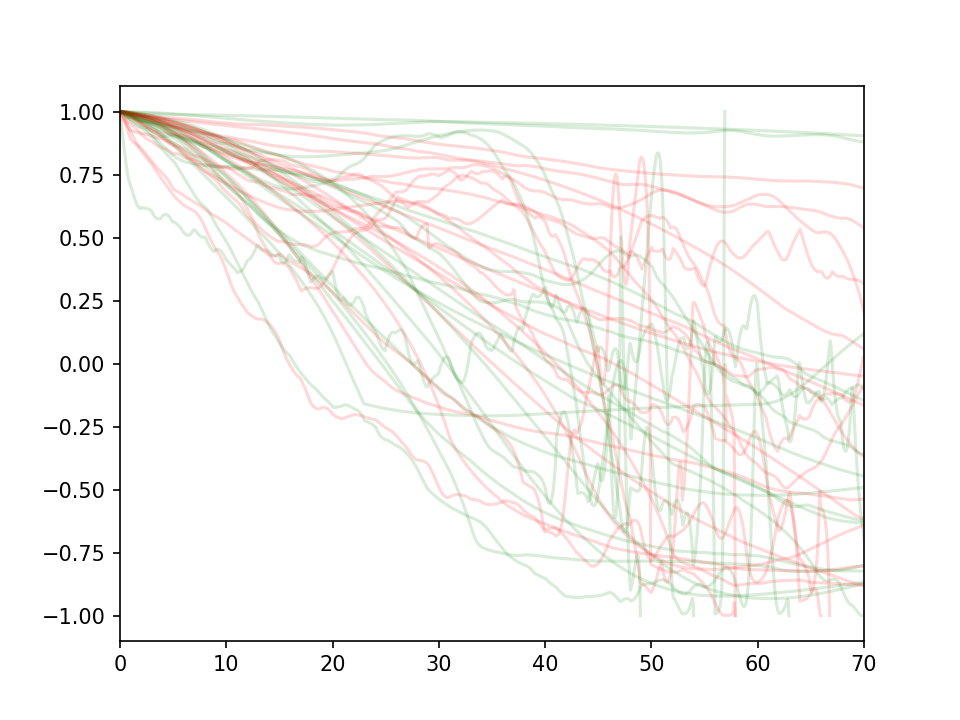

(0, 70)

In [18]:
plt.figure()
for candiname in sample_table['name'][20:40]:
    lc   = ascii.read(forcedphot_maglc+f'{candiname}_mag_fp_lc.ascii')
    lc   = lc[lc['mag']!=99.]
    lc   = lc[lc['tfrommarshalfdec']<=150]
    lc_r = lc[lc['filter']== 'r'] 
    lc_g = lc[lc['filter']== 'g'] 
    
    # let's take LC with at least 5 points 
    if len(lc_r) >5:
        t_r, mag_r        = interpolate_LC(lc_r['tfrommarshalfdec'], lc_r['mag'])
        lagt_r , autoco_r = autocorrelate_LC(t_r,mag_r)
        
        plt.plot(lagt_r,autoco_r, 'red', alpha = 0.15)
        
    if len(lc_g) >5:
        t_g, mag_g = interpolate_LC(lc_g['tfrommarshalfdec'], lc_g['mag'])
        lagt_g , autoco_g = autocorrelate_LC(t_g,mag_g)
        
        
        plt.plot(lagt_g,autoco_g, 'green', alpha = 0.15)
        
        
plt.xlim(0,70)

# Notes 

## Binning
I am binning the data prior to the interpolation in order to have a smoother interpolation. 

## Interpolation
In order to perform the autocorrelation, the data needs to be equally spaced. The lags have to be constant steps so that the autocorrelation has meaning (usually, autocorrelation is done with the index of the data which are a suite of integers, or perfomed with equally spaced measurements. We want that the x axis of the autocorrelation be the real time and not the indices). I interpolate the data using the binned lightcurve (usually binned from day 4 not to lose the information on the early rise). 

## Autoccorelation
The autocorrelation is performed  and we then try to fit the "easiest" kernel to it (the squared exponential). 
<b> Current question </b> what are meanings of the parameters? We will use the package George for perfoming the gaussian processes interpolation, so I need one of their kernel's expresion. The "length" of the kernel is what we believe the autocorrelation "length" (fitted with the sq exp). 

## Step further: the gaussian process itself. 
Given the indication of the kernel size given by the autocorrelation function, we will get an error on the fit. This could be used then in a MCMC routine to find the best parameter for each light curve.


ZTF19abqhobb


<IPython.core.display.Javascript object>


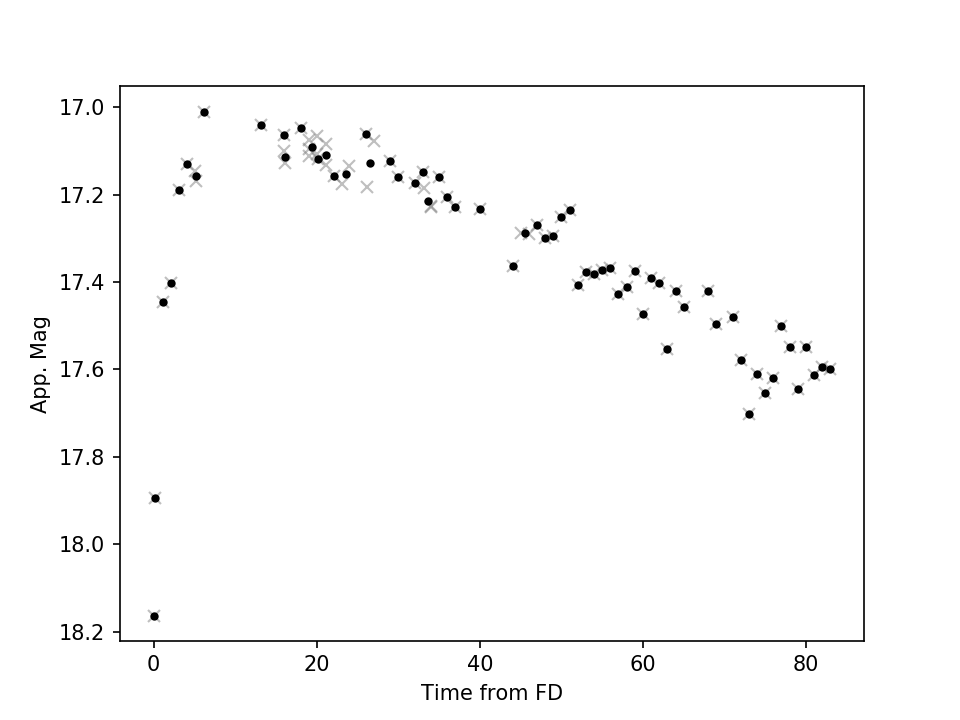

<IPython.core.display.Javascript object>


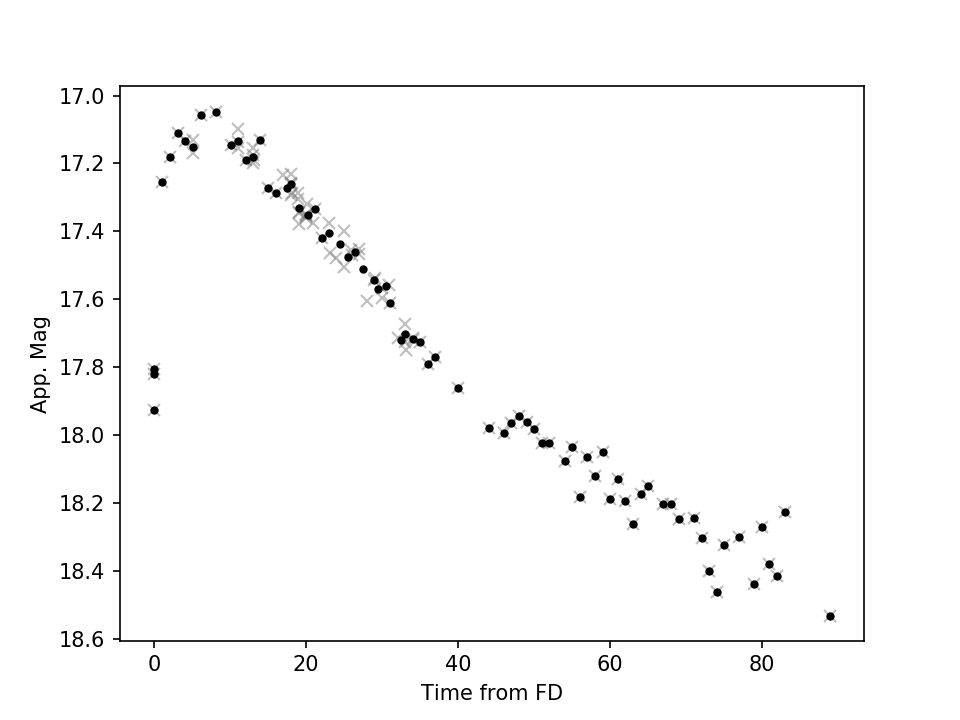

<IPython.core.display.Javascript object>


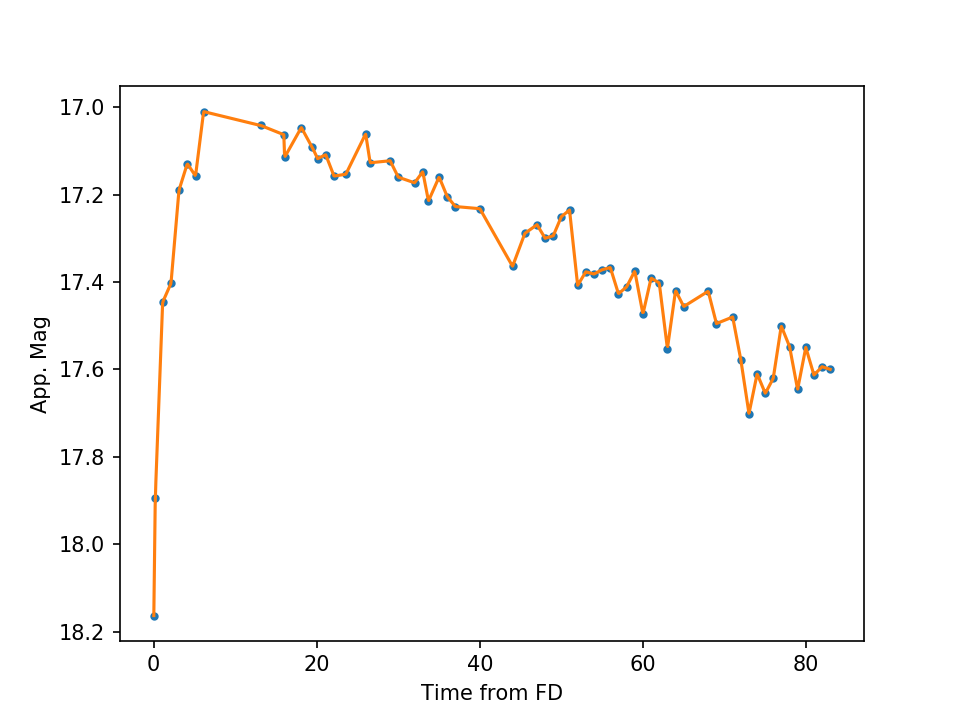

<IPython.core.display.Javascript object>


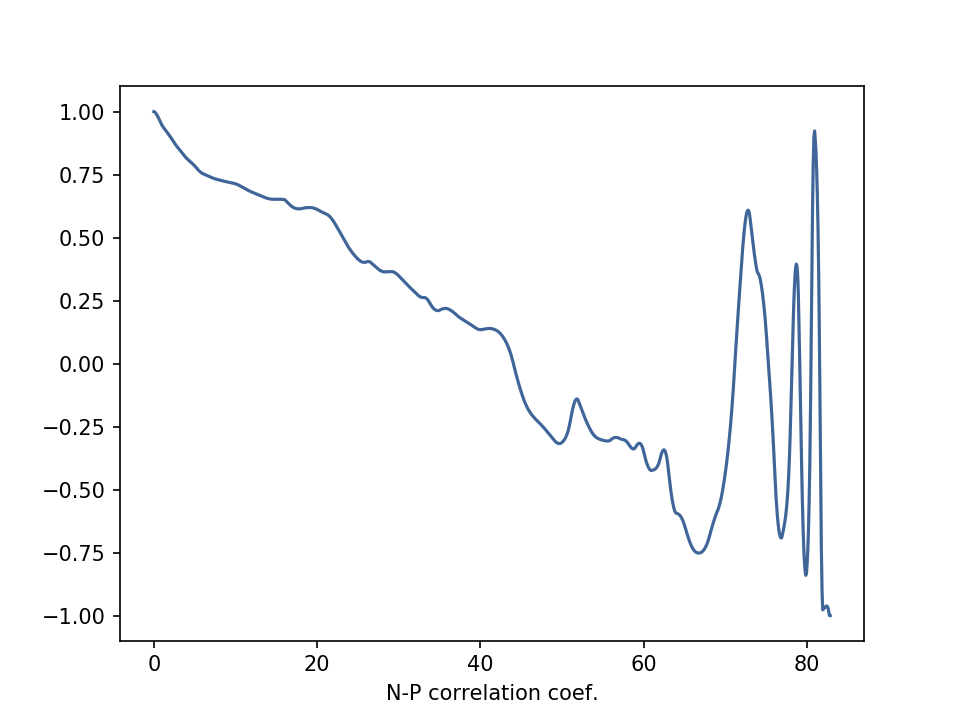

<IPython.core.display.Javascript object>


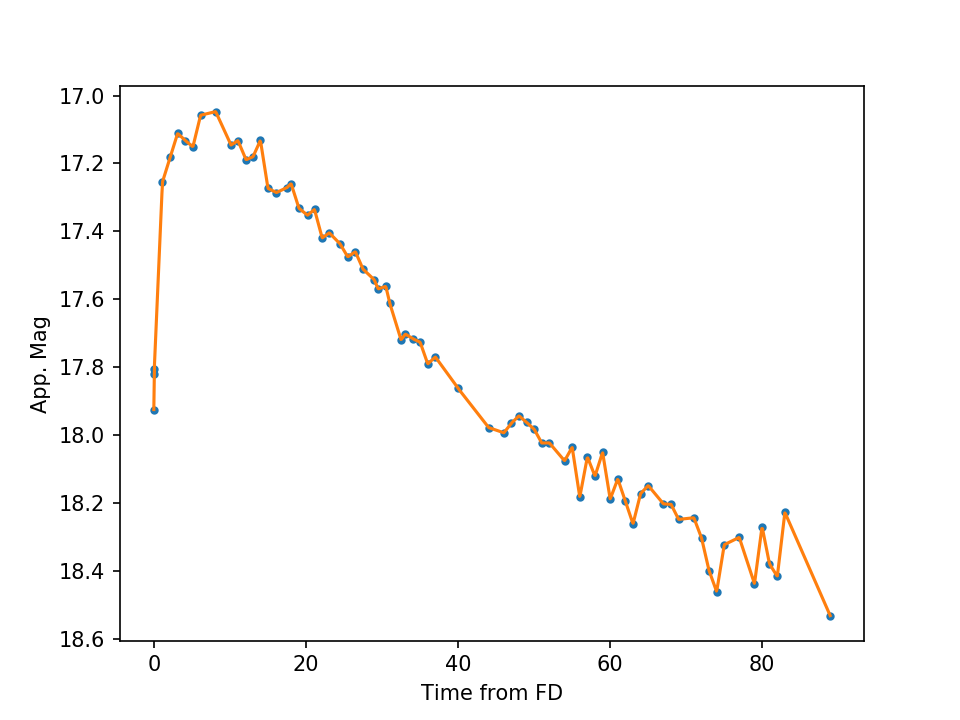

<IPython.core.display.Javascript object>


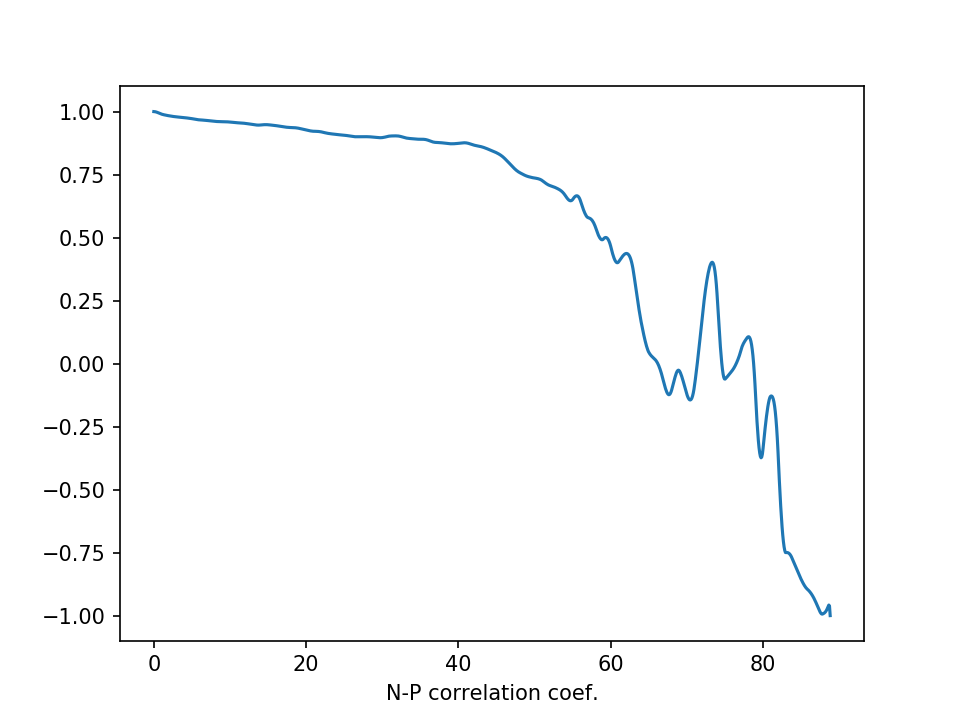

ZTF19abuzinv


<IPython.core.display.Javascript object>


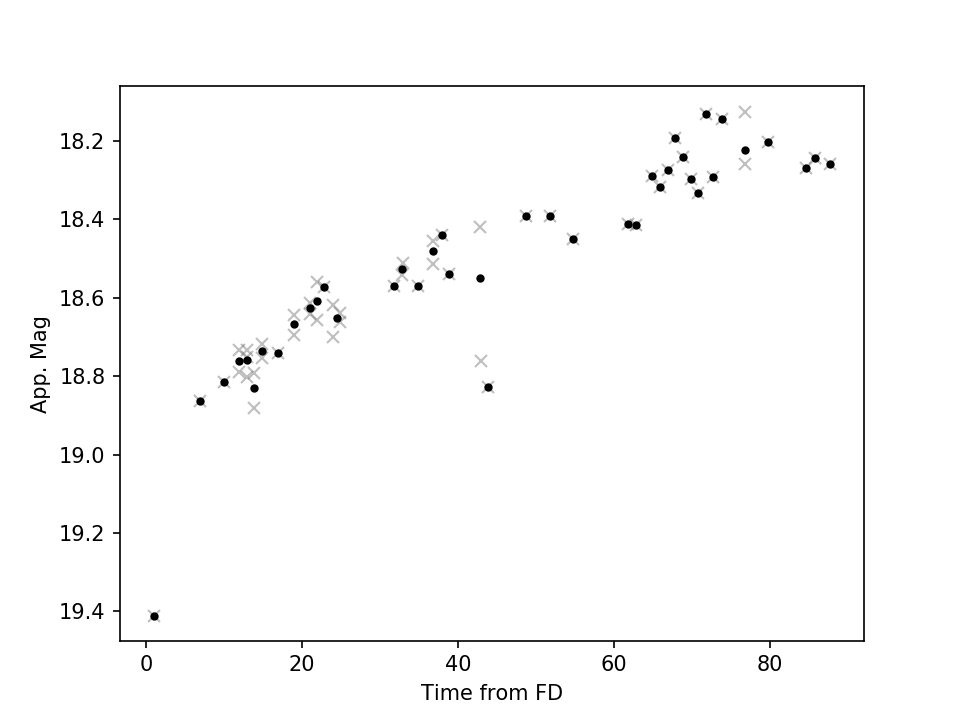

<IPython.core.display.Javascript object>


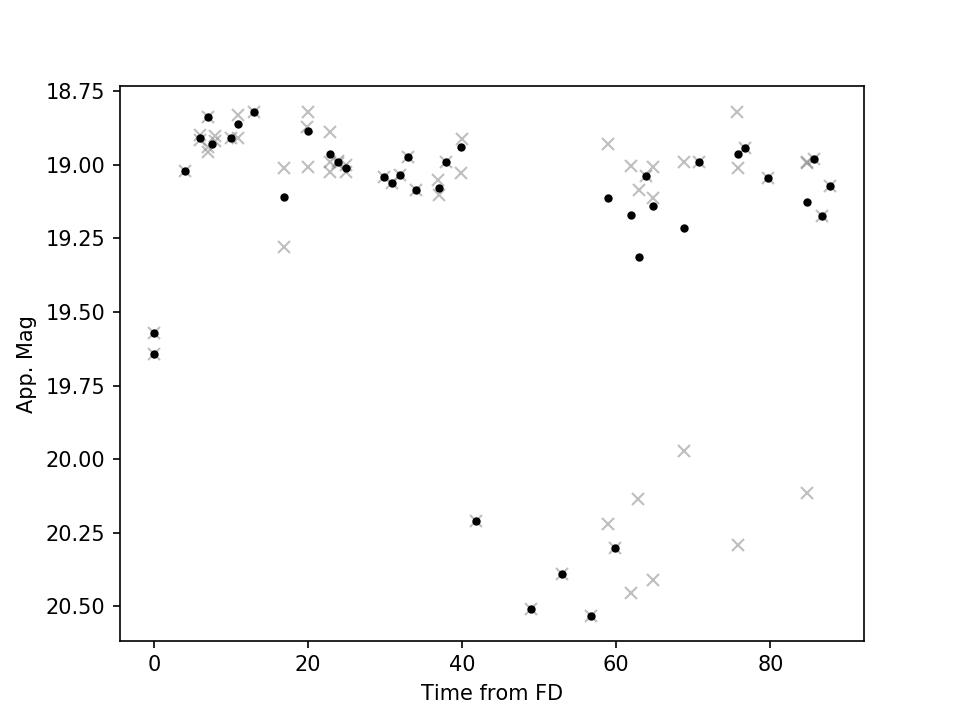

<IPython.core.display.Javascript object>


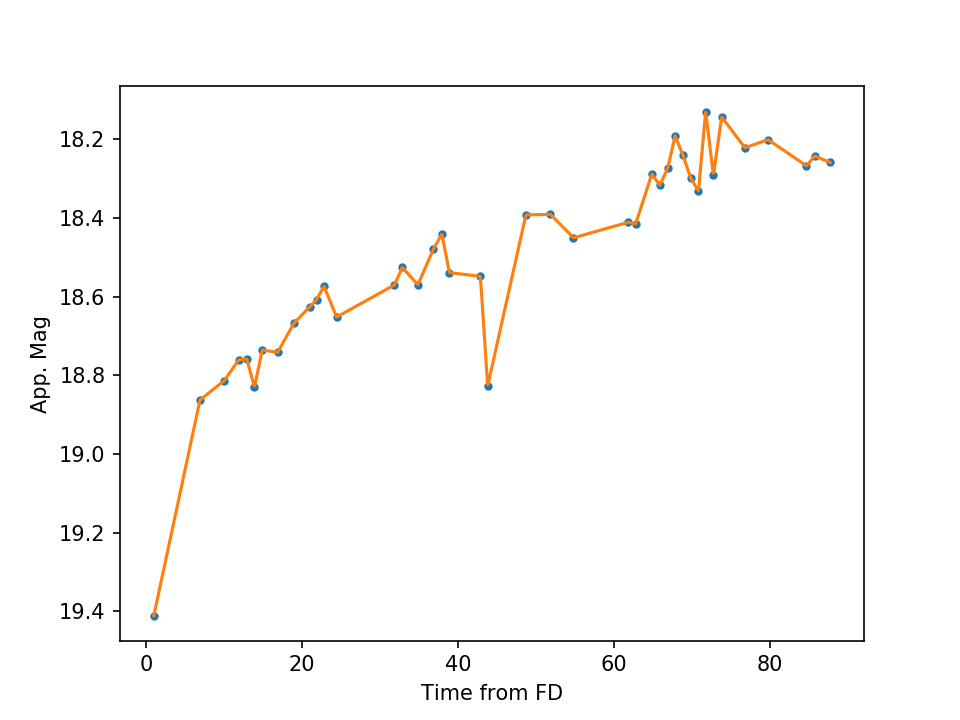

<IPython.core.display.Javascript object>


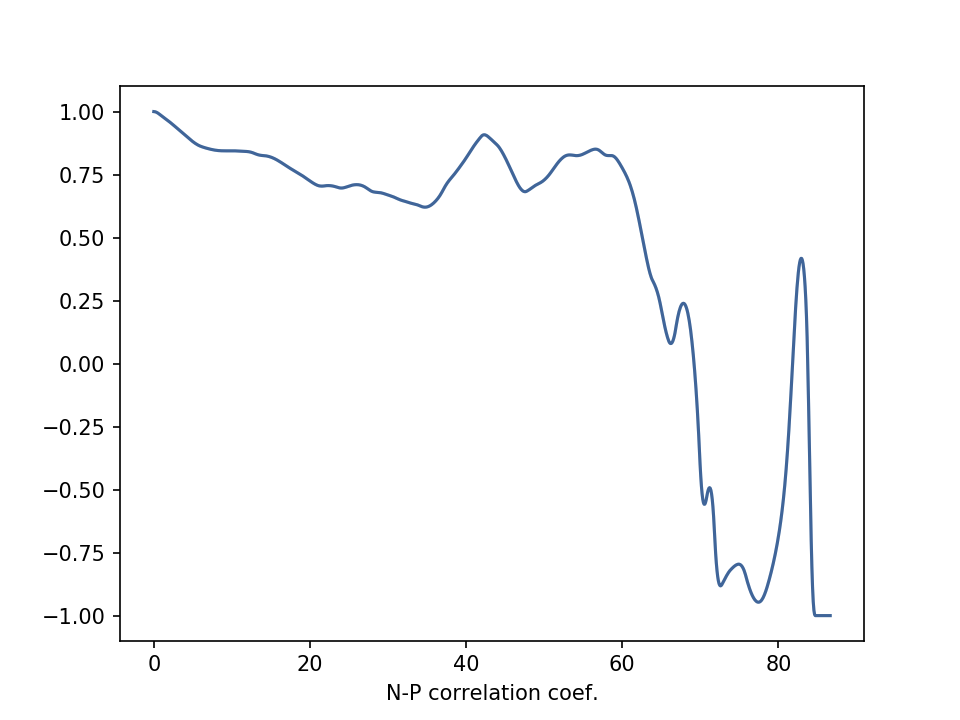

<IPython.core.display.Javascript object>


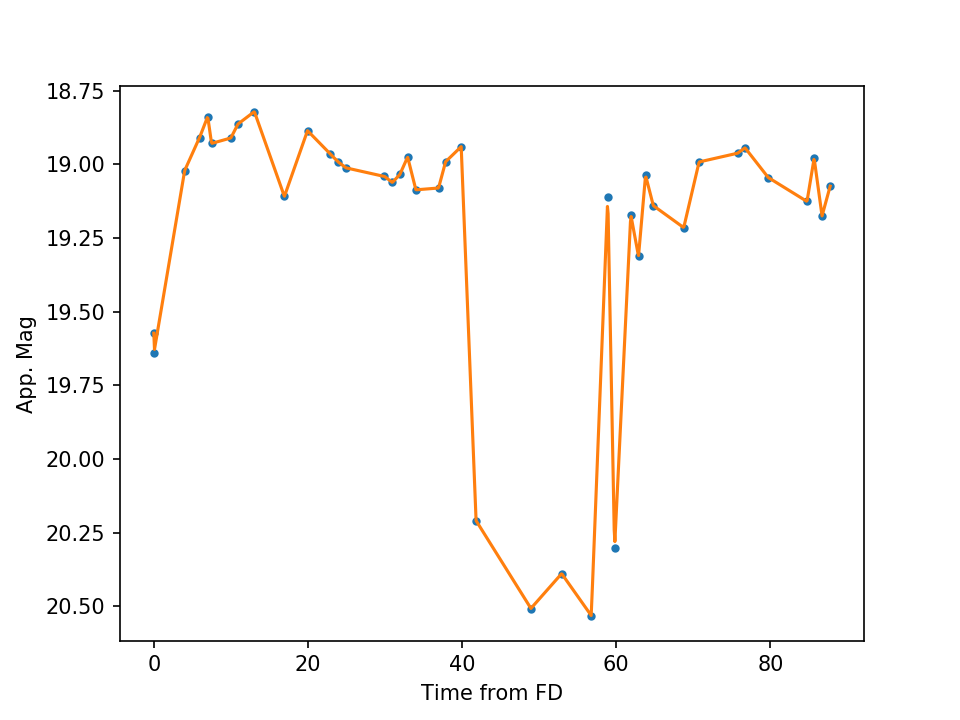

<IPython.core.display.Javascript object>


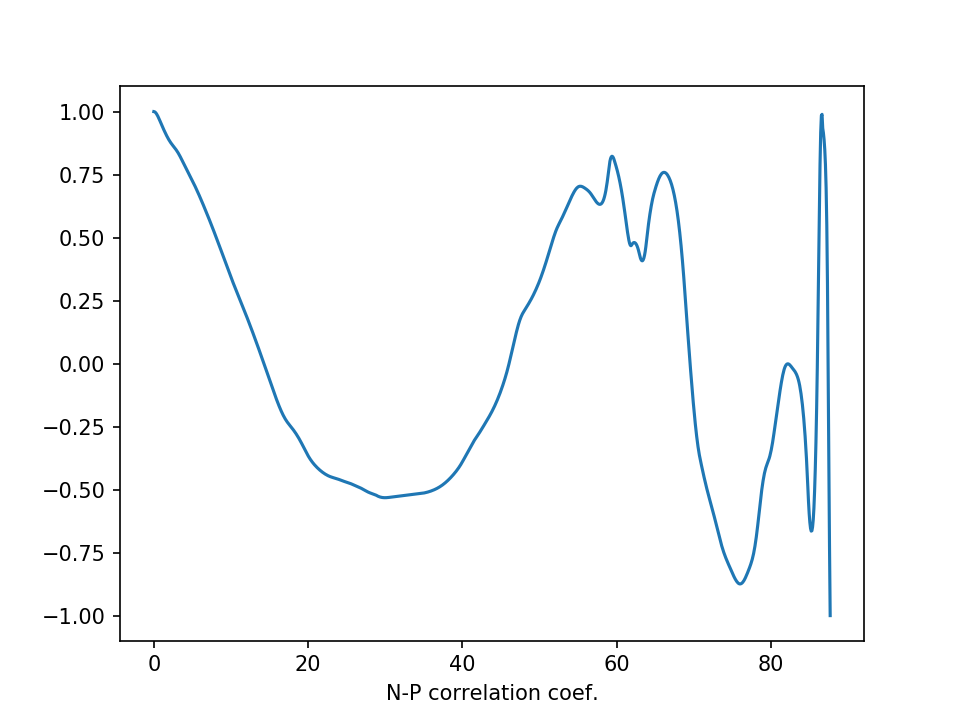

ZTF19abyuzch


<IPython.core.display.Javascript object>


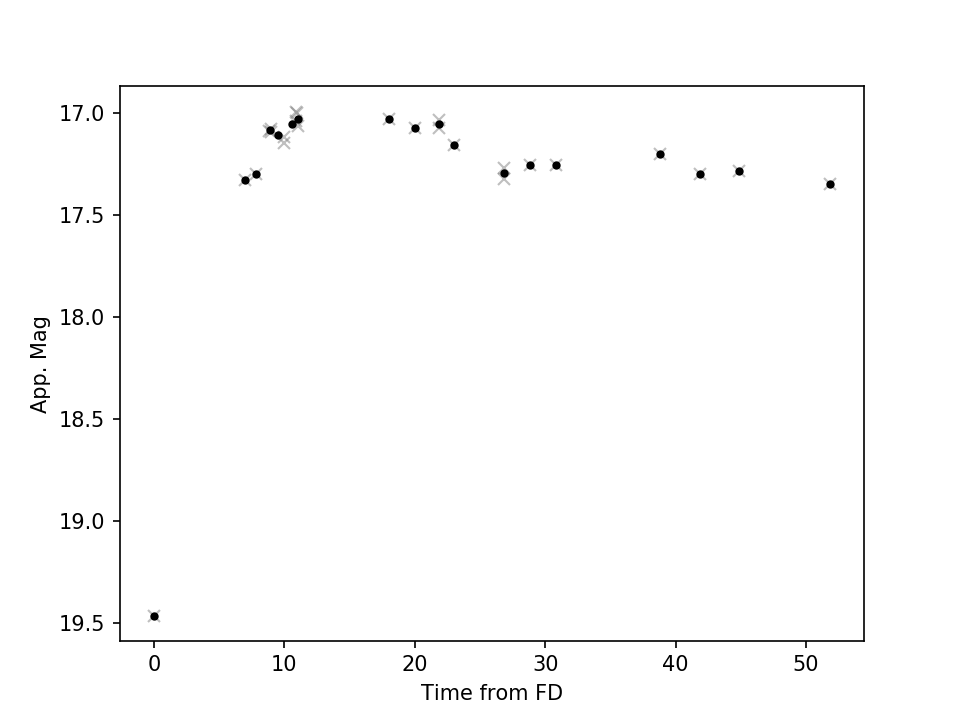

<IPython.core.display.Javascript object>


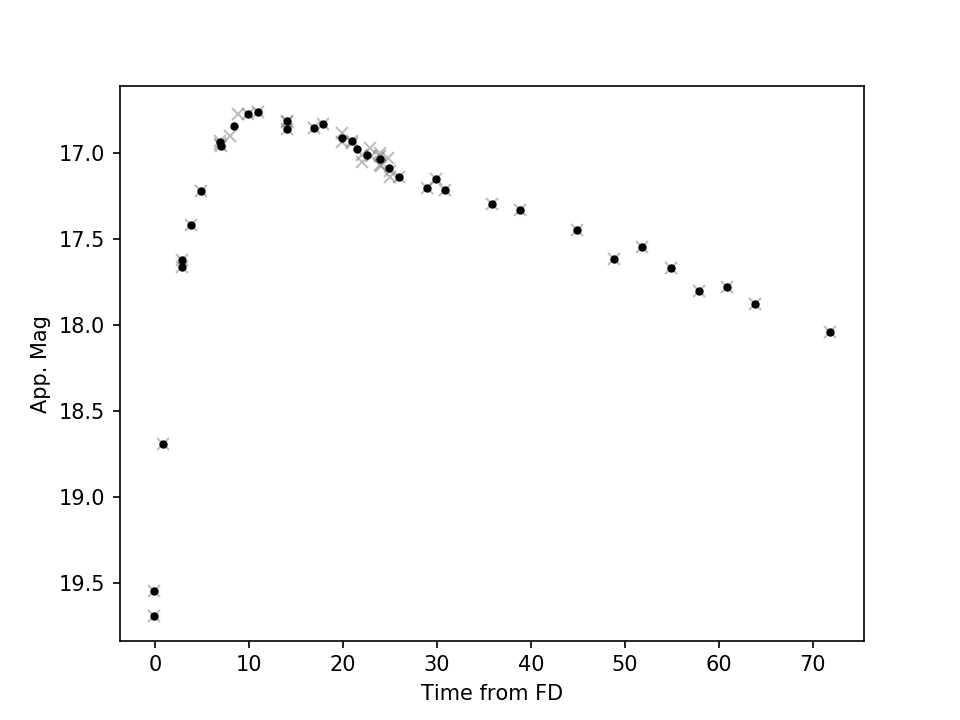

<IPython.core.display.Javascript object>


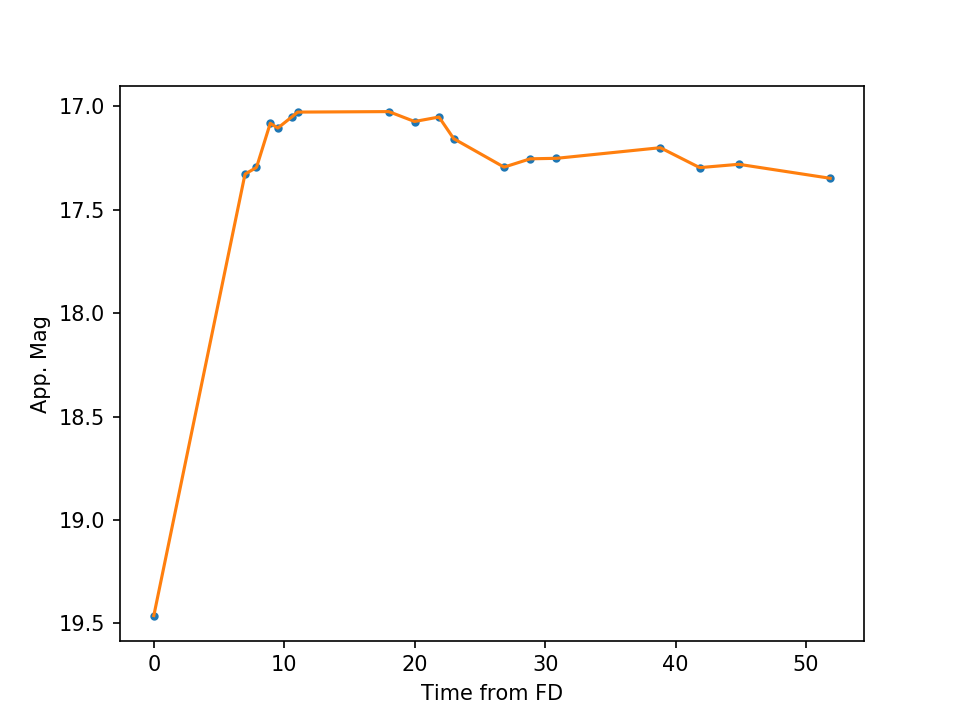

<IPython.core.display.Javascript object>


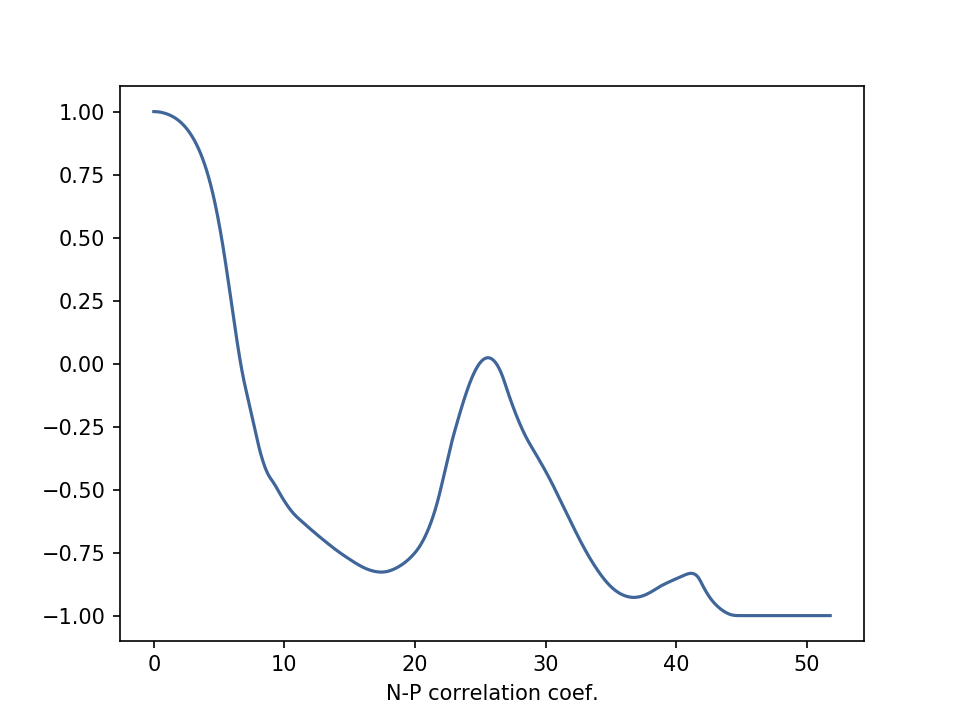

<IPython.core.display.Javascript object>


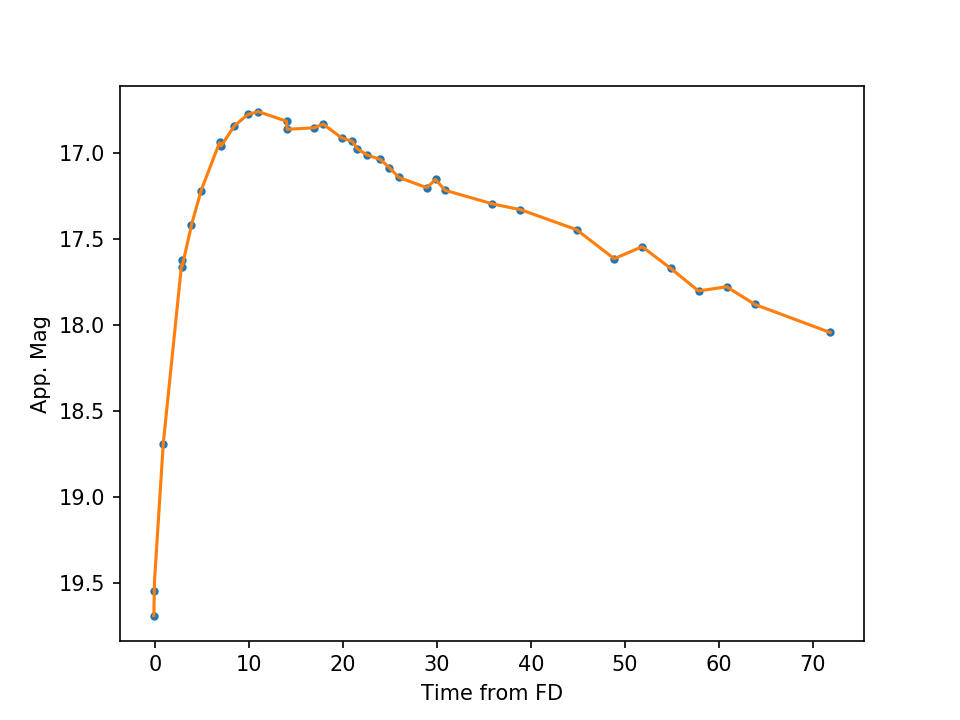

<IPython.core.display.Javascript object>


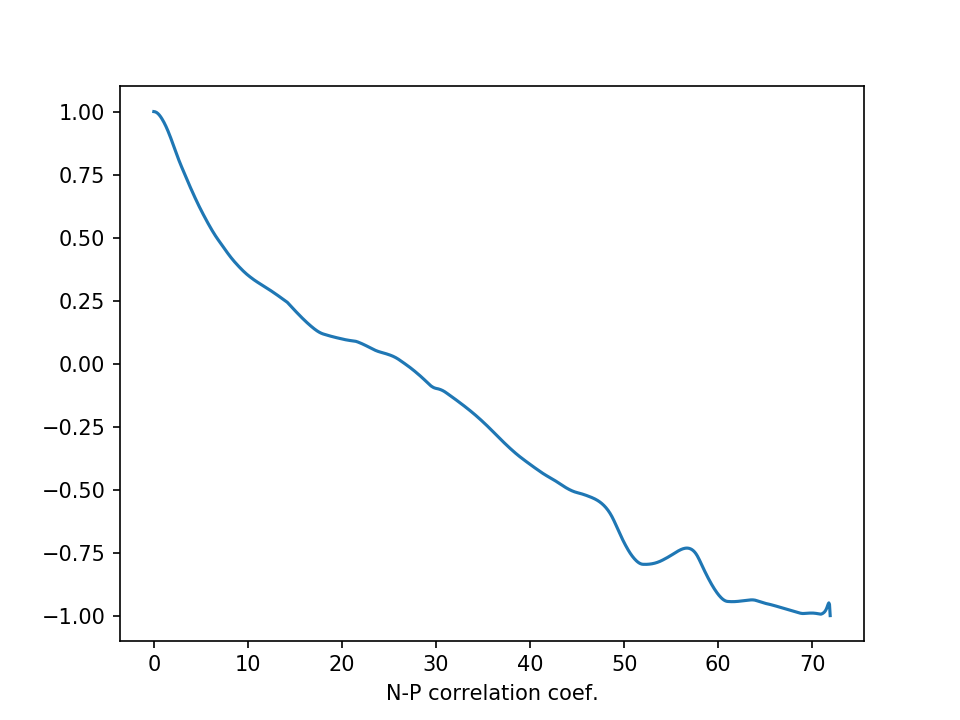

ZTF19acftfav


<IPython.core.display.Javascript object>


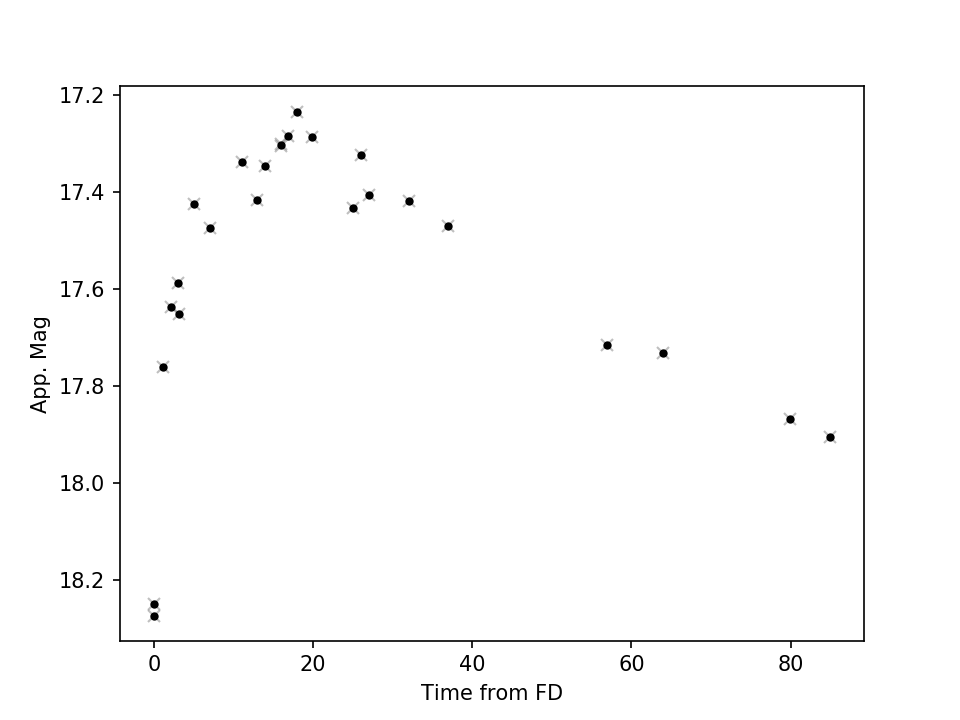

<IPython.core.display.Javascript object>


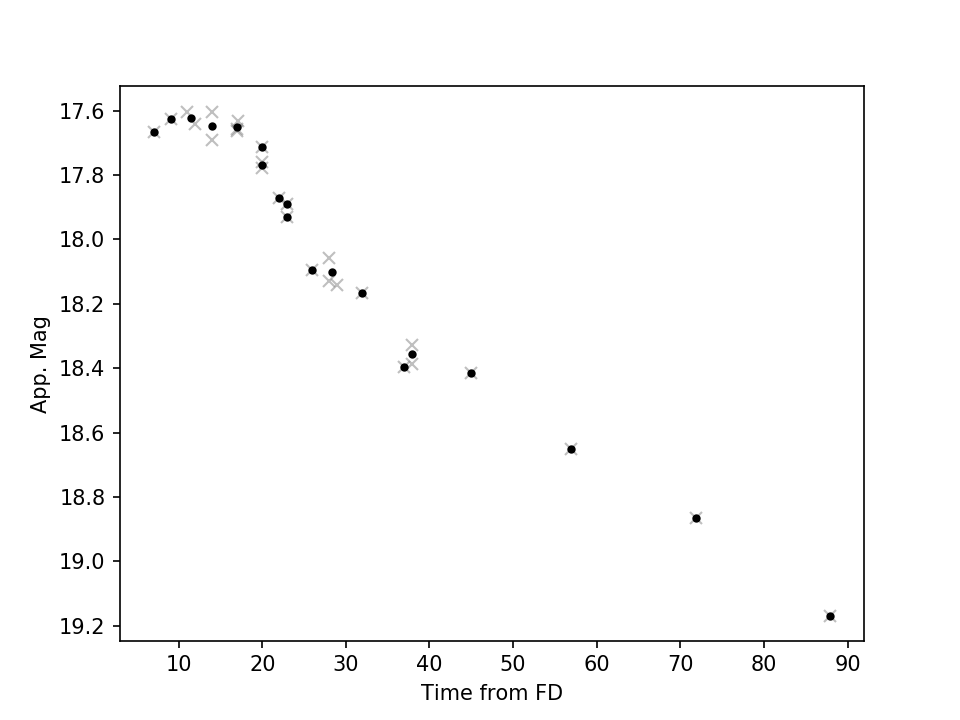

/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


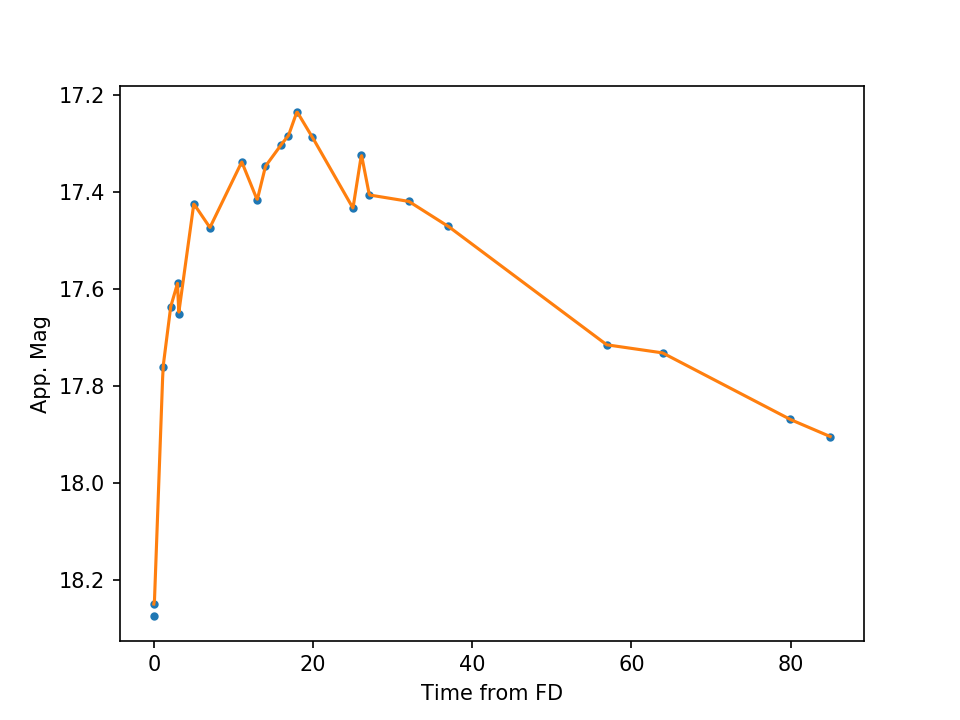

/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


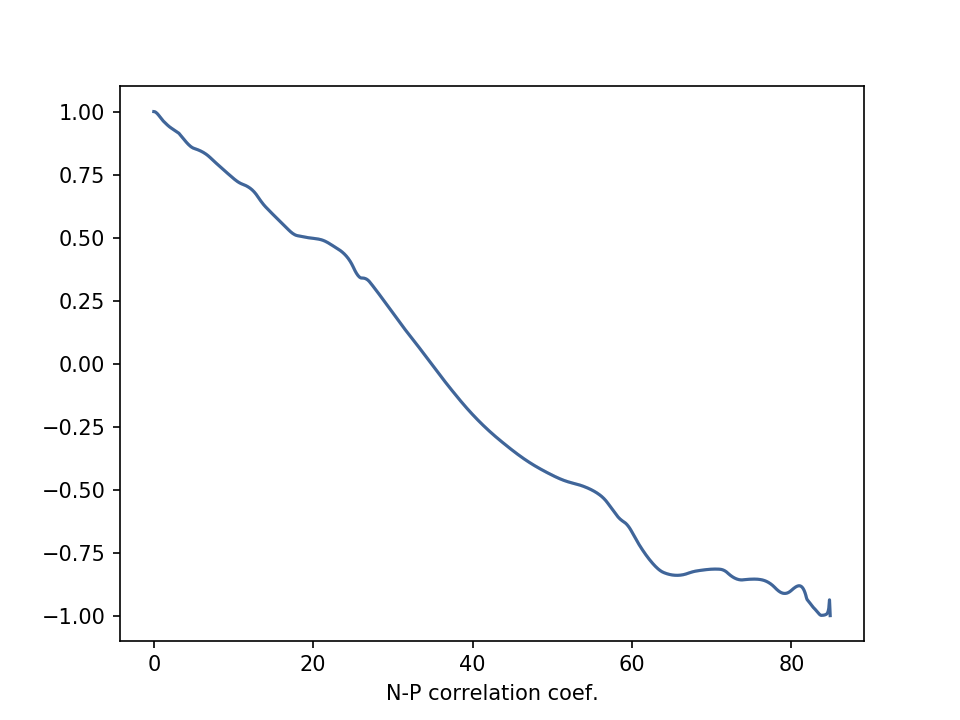

<IPython.core.display.Javascript object>


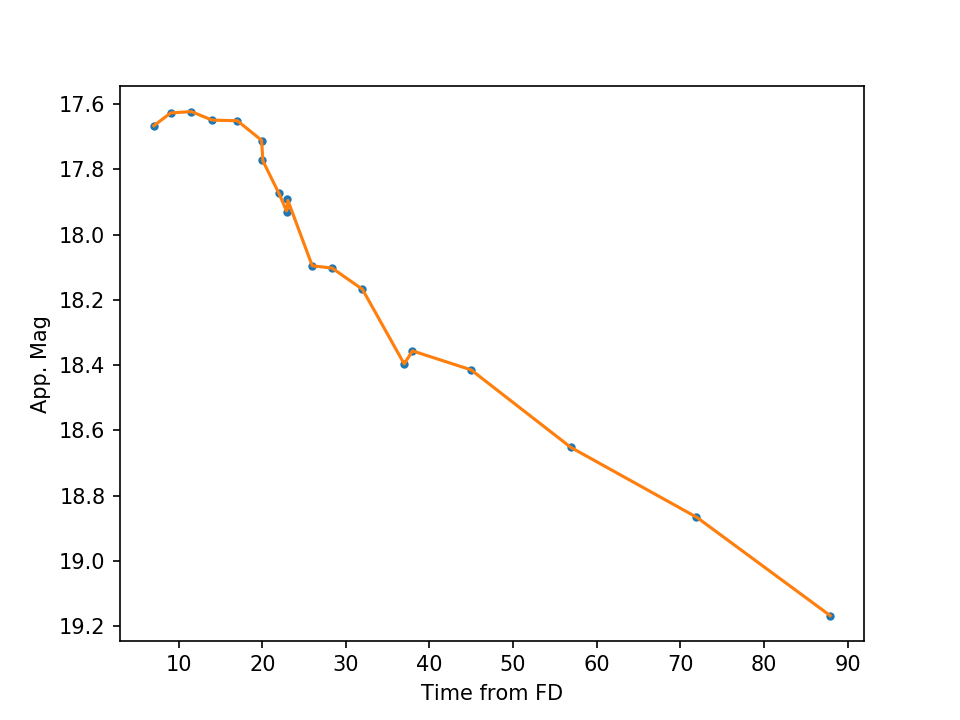

<IPython.core.display.Javascript object>


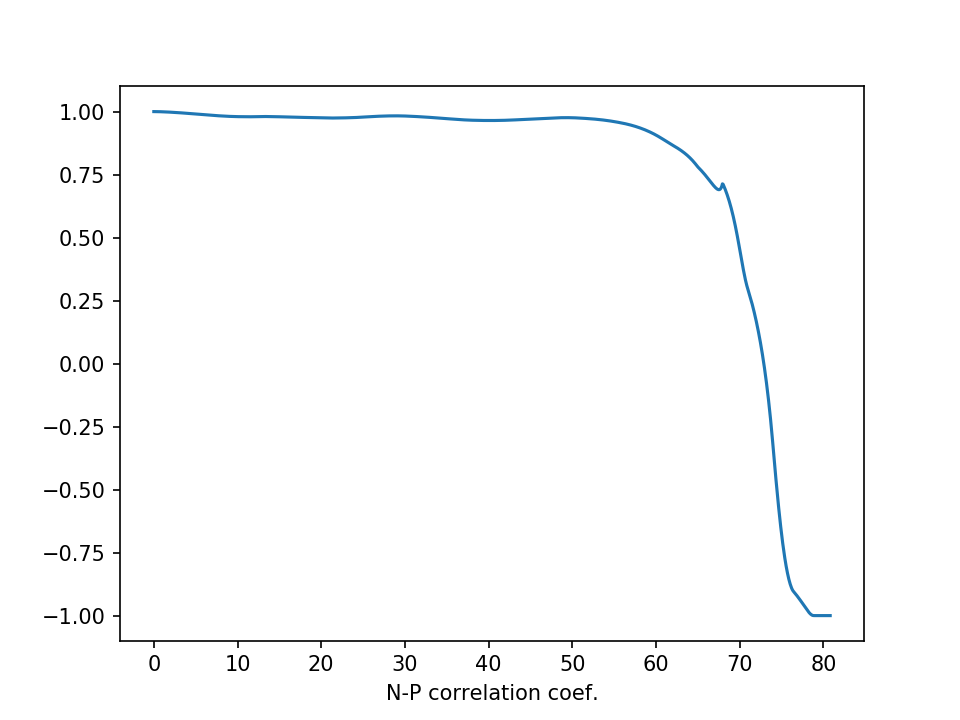

ZTF19aclobbu


/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


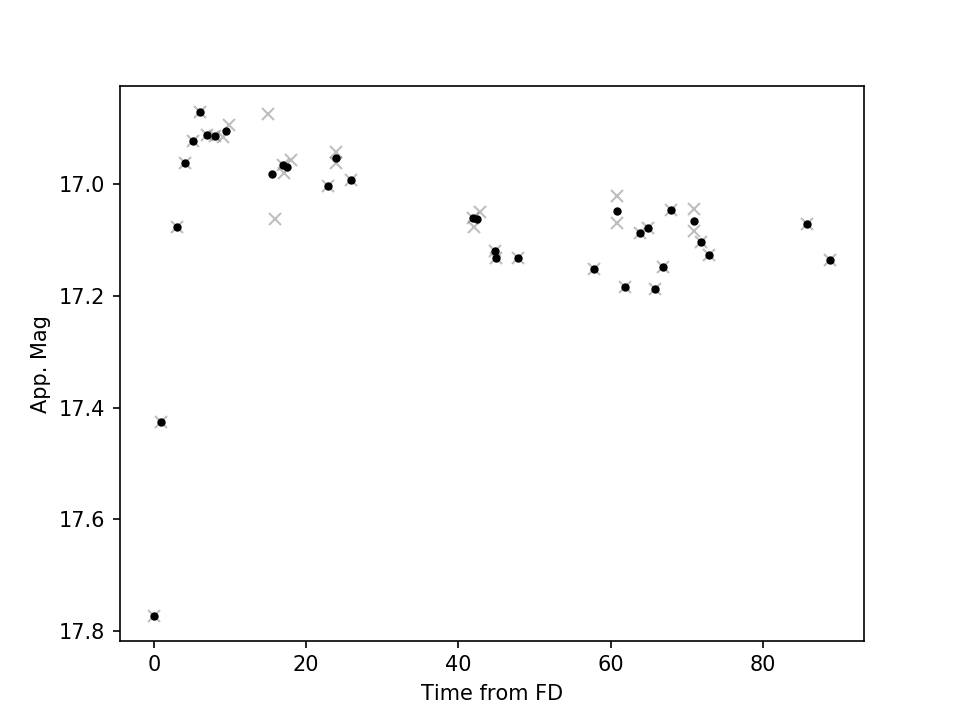

<IPython.core.display.Javascript object>


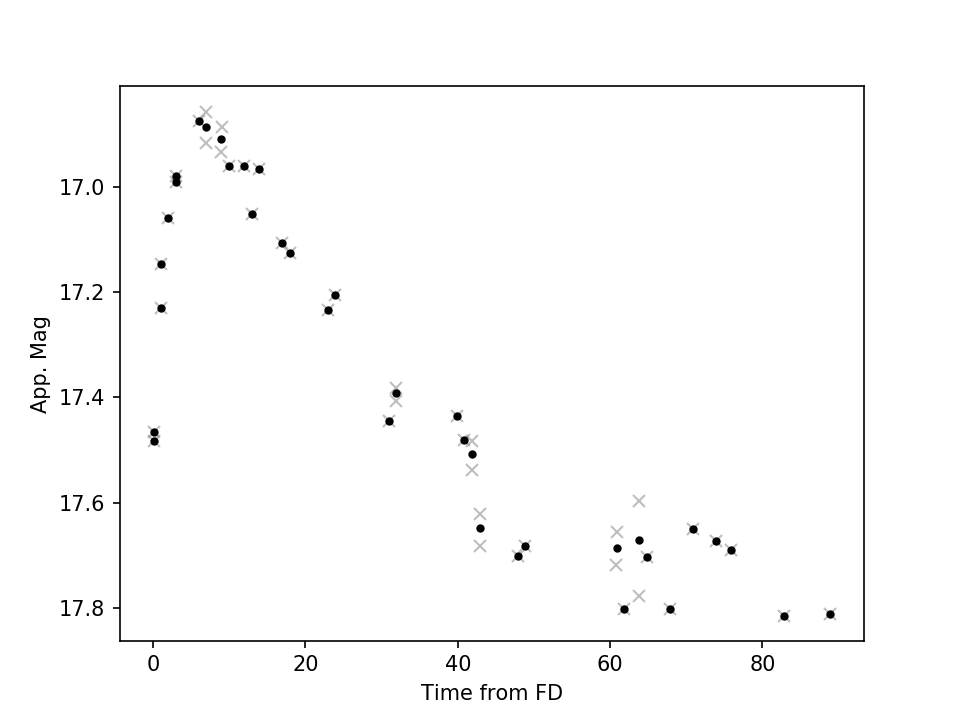

<IPython.core.display.Javascript object>


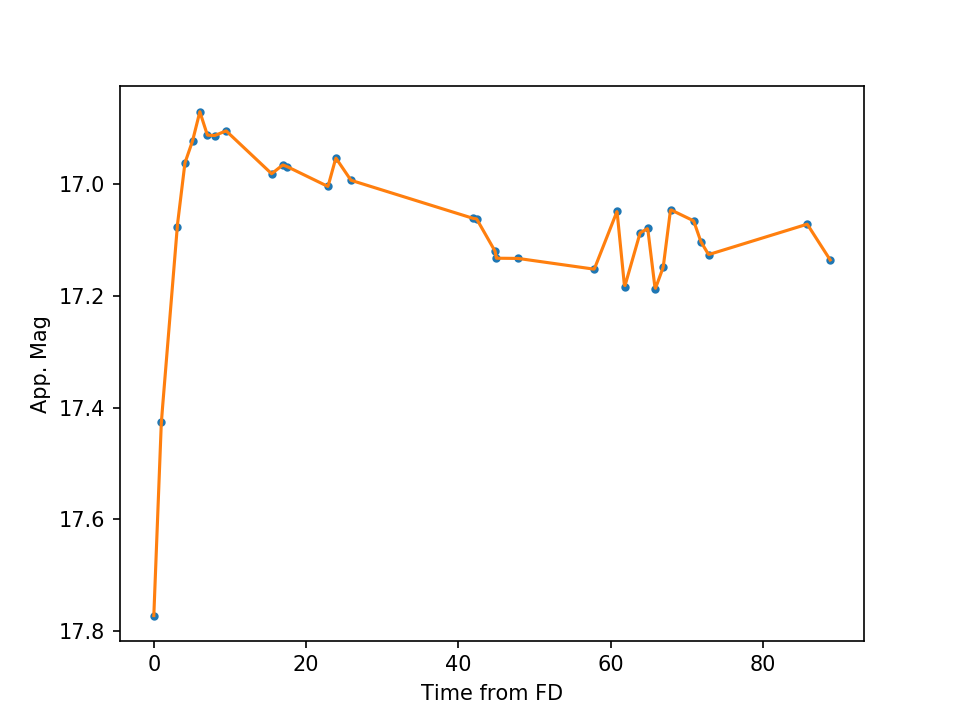

<IPython.core.display.Javascript object>


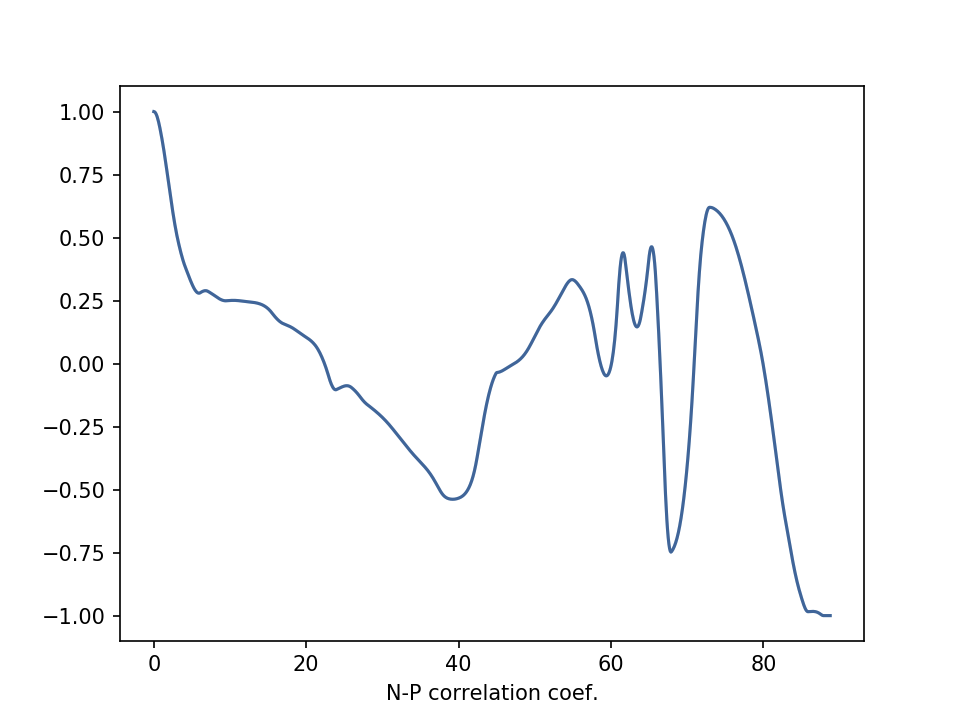

<IPython.core.display.Javascript object>


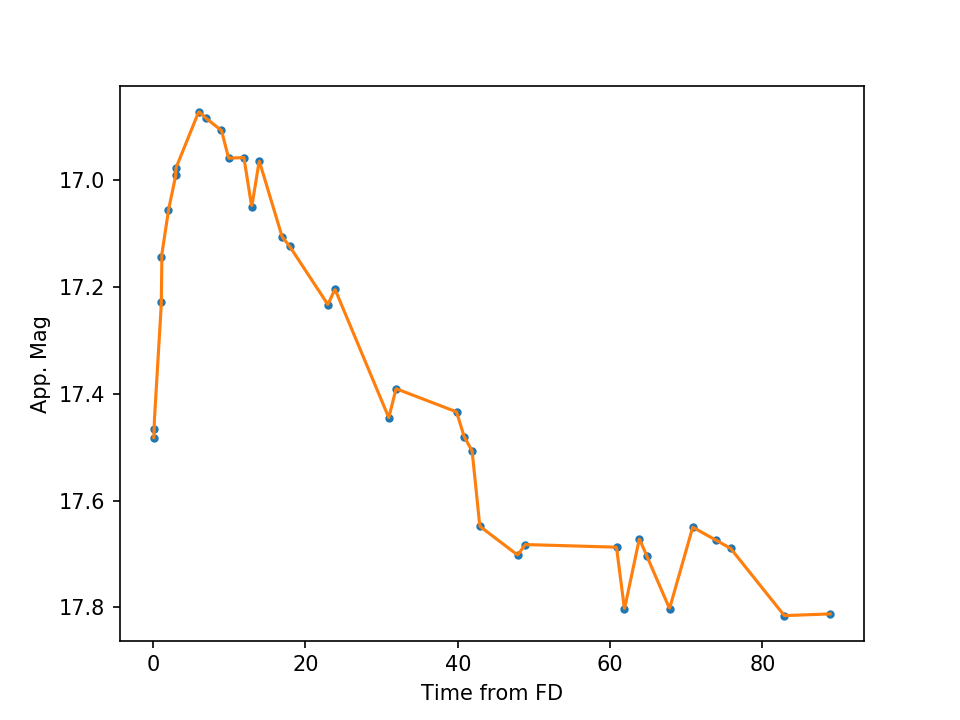

<IPython.core.display.Javascript object>


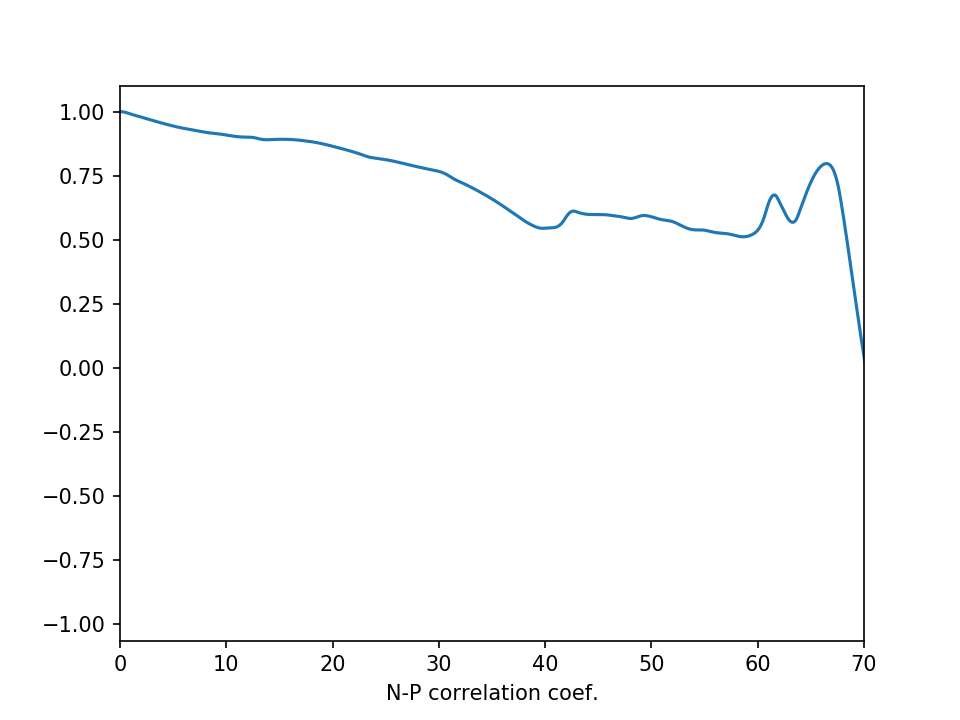

(0, 70)

In [17]:
## SMOOTHED LC VERSION 


# plt.figure()
for candiname in nearby_no2b['name'][10:15]:
    print(candiname)
    lc   = ascii.read(forcedphot_maglc+f'{candiname}_mag_fp_lc.ascii')
    lc   = lc[lc['mag']!=99.]
    lc   = lc[lc['tfrommarshalfdec']<=90]
    lc   = lc[lc['tfrommarshalfdec']>=-0.5]
    lc_r = lc[lc['filter']== 'r'] 
    lc_g = lc[lc['filter']== 'g'] 
    

    smooth_lc_r = bin_LC(lc_r,5,150, plot = True)
    smooth_lc_g = bin_LC(lc_g,5,150, plot = True)

    
    # let's take LC with at least 5 points 
    if len(lc_r) >5:
        t_r, mag_r        = interpolate_LC(smooth_lc_r['tfrommarshalfdec'], smooth_lc_r['mag'], plot=True)
        lagt_r , autoco_r = autocorrelate_LC(t_r,mag_r, plot=True)
        
        plt.plot(lagt_r,autoco_r, 'red', alpha = 0.15)
        
    if len(lc_g) >5:
        t_g, mag_g = interpolate_LC(smooth_lc_g['tfrommarshalfdec'], smooth_lc_g['mag'], plot = True)
        lagt_g , autoco_g = autocorrelate_LC(t_g,mag_g, plot=True)
        
        
#         plt.plot(lagt_g,autoco_g, 'green', alpha = 0.15)
        
        
plt.xlim(0,70)

# Trying to implement the GP based on that Kernel

Taking as a test subject ZTF19abuzinv which is pretty bad and the good old ZTF18abeajml

## IMPORTANT NOTE : 

it is of primordial importance to substract the mean of the magnitudes. George assumes that the "mean" of the function (where it generated the gaussian distributed functions before anchoring it to the observations) is 0 and not the actual mean. 

(Thanks Amir)

In [14]:
def sq_exp(x, l):
    '''
    function to fit autocorrelated function. Squared exponential. should be the on eused for gaussian processes
    (need to fit only half of it)
    parameters
    ----------
    x [array] time sequence (time lag )
    l [float] (parameter to optimize) typical size of
    
    
    returns
    -------
    
    
    '''
    
    return np.exp(-( (x**2) / (2*(l**2)) ) )

<IPython.core.display.Javascript object>


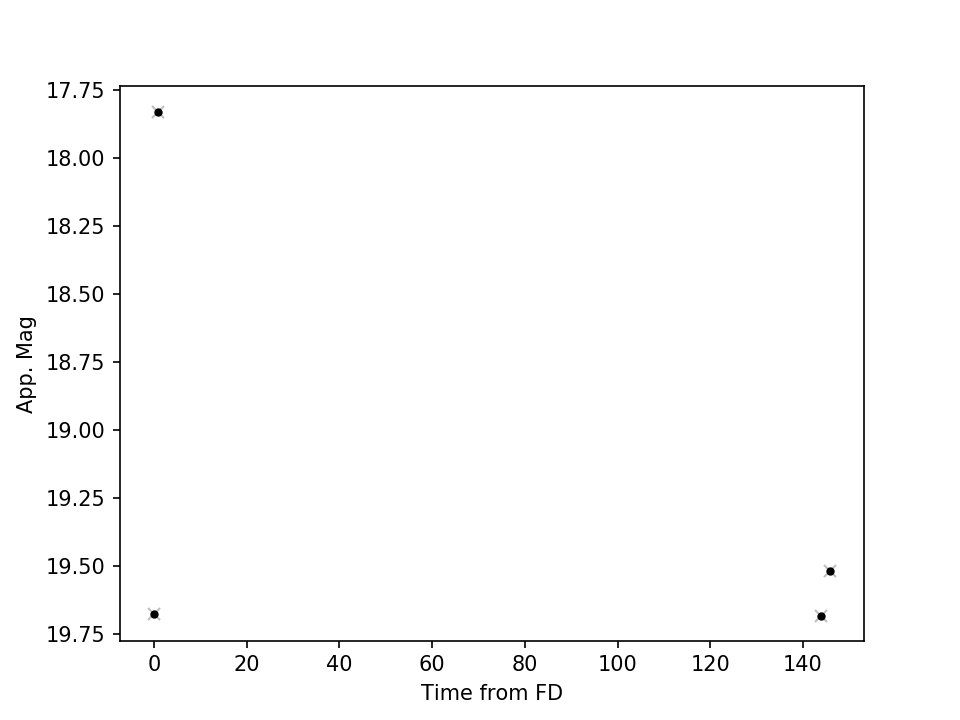

<IPython.core.display.Javascript object>


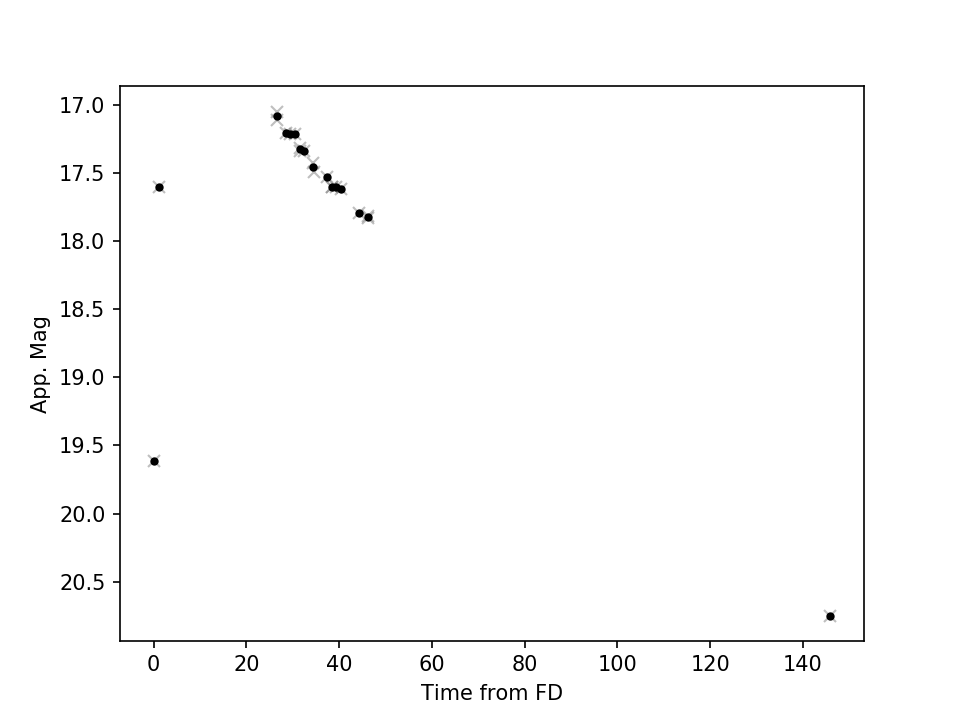

<IPython.core.display.Javascript object>


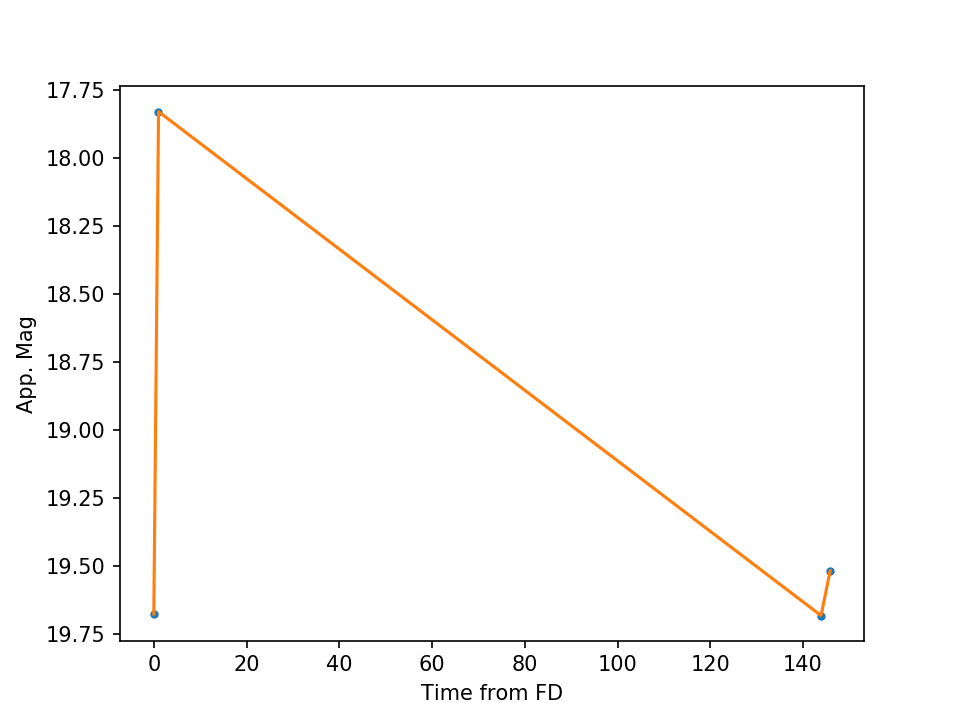

<IPython.core.display.Javascript object>


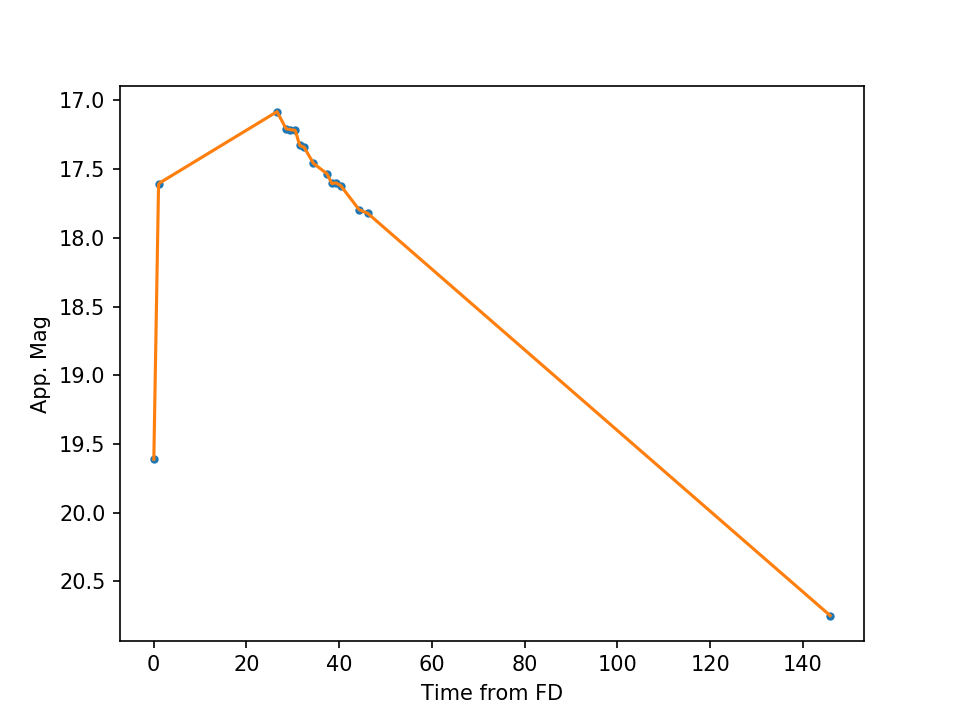

The autocorrelation according to colour


<IPython.core.display.Javascript object>


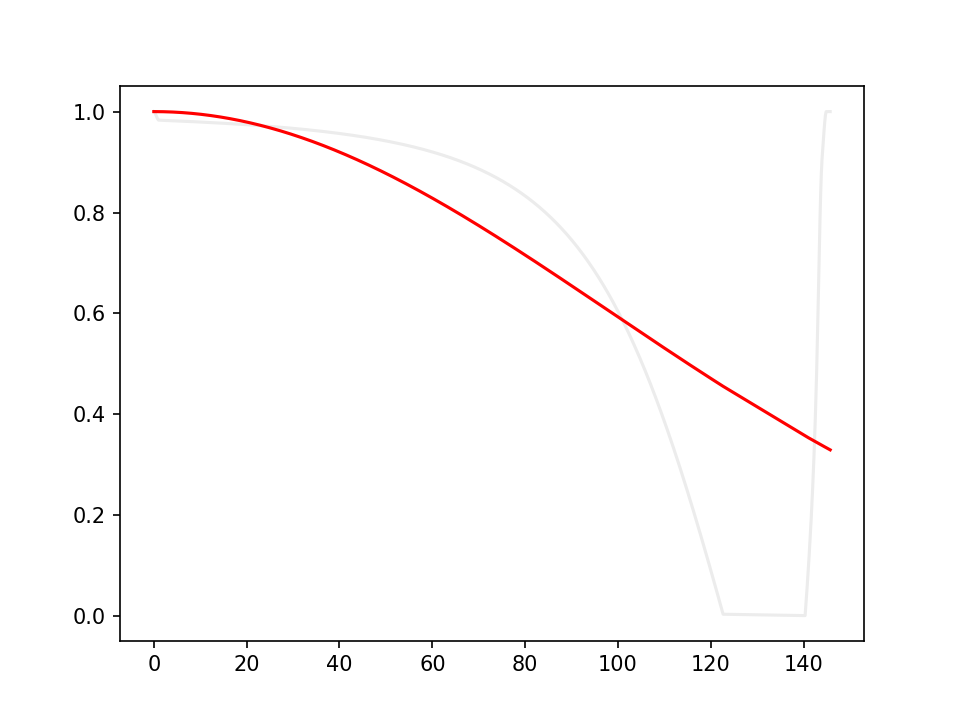

<IPython.core.display.Javascript object>


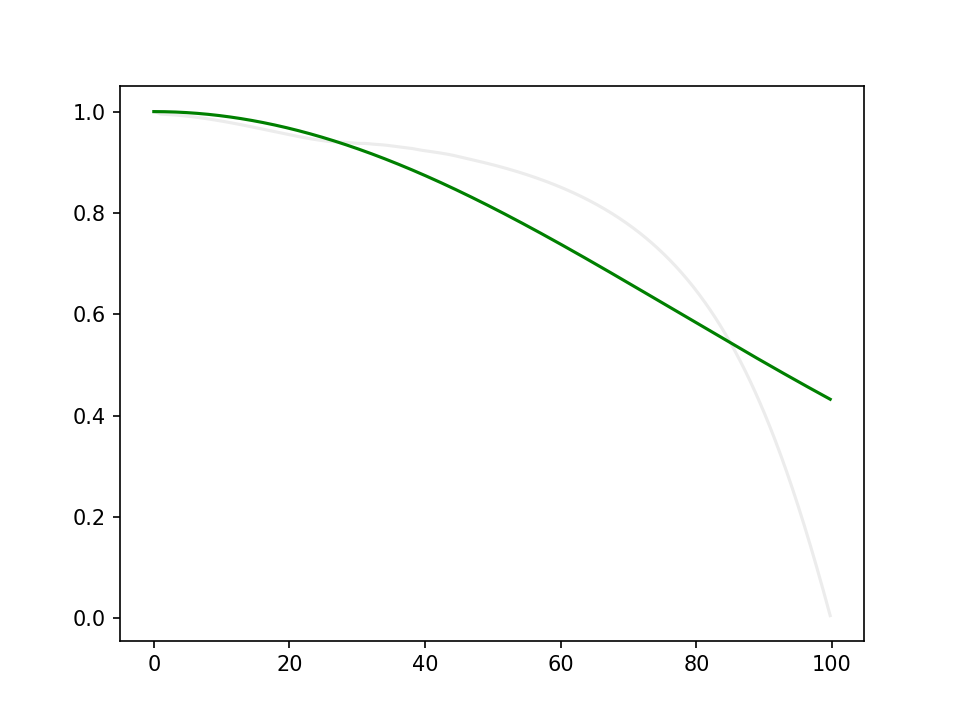

In [19]:
lc   = ascii.read(forcedphot_maglc+'ZTF20ablygyy_mag_fp_lc_exzcorr.ascii')
lc   = lc[lc['mag']!=99.]
lc   = lc[lc['tfrommarshalfdec']<=150]
lc   = lc[lc['tfrommarshalfdec']>=-0.5]
lc_r = lc[lc['filter']== 'r'] 
lc_g = lc[lc['filter']== 'g'] 


bined_lc_r = bin_LC(lc_r,4,150,plot=True)
bined_lc_g = bin_LC(lc_g,4,150,plot=True)


t_r, mag_r = interpolate_LC(bined_lc_r['tfrommarshalfdec'], bined_lc_r['mag'], plot=True)
# lagt_r , autoco_r = autocorrelate_LC(t_r,mag_r, plot=False)    
autoco_r   = autocorrelate_LC(t_r,mag_r, plot=False, table=True)    

t_g, mag_g = interpolate_LC(bined_lc_g['tfrommarshalfdec'], bined_lc_g['mag'], plot = True)
# lagt_g , autoco_g = autocorrelate_LC(t_g,mag_g, plot=False)
autoco_g   = autocorrelate_LC(t_g,mag_g, plot=False, table=True)

autoco_r = autoco_r[autoco_r['autocorrelation']>=0]
autoco_g = autoco_g[autoco_g['autocorrelation']>=0]

popt_r, pcov_r = curve_fit(sq_exp, autoco_r['lags'], autoco_r['autocorrelation'])
popt_g, pcov_g = curve_fit(sq_exp, autoco_g['lags'], autoco_g['autocorrelation'])

# lagt_r   = np.array(lagt_r)
# autoco_r = np.array(autoco_r)

# lagt_g   = np.array(lagt_g)
# autoco_g = np.array(autoco_g)

# popt_r, pcov_r = curve_fit(sq_exp, lagt_r, autoco_r)
# popt_g, pcov_g = curve_fit(sq_exp, lagt_g, autoco_g)



print('The autocorrelation according to colour')

plt.figure()
plt.plot(autoco_r['lags'], autoco_r['autocorrelation'], 'grey', alpha = 0.15)
plt.plot(autoco_r['lags'], sq_exp(autoco_r['lags'], *popt_r), 'r-')


plt.figure()
plt.plot(autoco_g['lags'], autoco_g['autocorrelation'], 'grey', alpha = 0.15)
plt.plot(autoco_g['lags'], sq_exp(autoco_g['lags'], *popt_g), 'g-')

# plt.figure()
# plt.plot(lagt_r,autoco_r, 'grey', alpha = 0.15)
# plt.plot(lagt_r, sq_exp(lagt_r, *popt_r), 'r-')


# plt.figure()
# plt.plot(lagt_g,autoco_g, 'grey', alpha = 0.15)
# plt.plot(lagt_g, sq_exp(lagt_g, *popt_g), 'g-')

In [28]:
popt_g

array([73.7750362])

## Question: maybe should fit only the positive autocorrelation? what does it really mean when it becomes negative? 

The function itself is always positive, so let's try fittin git only when it's positive .

<IPython.core.display.Javascript object>


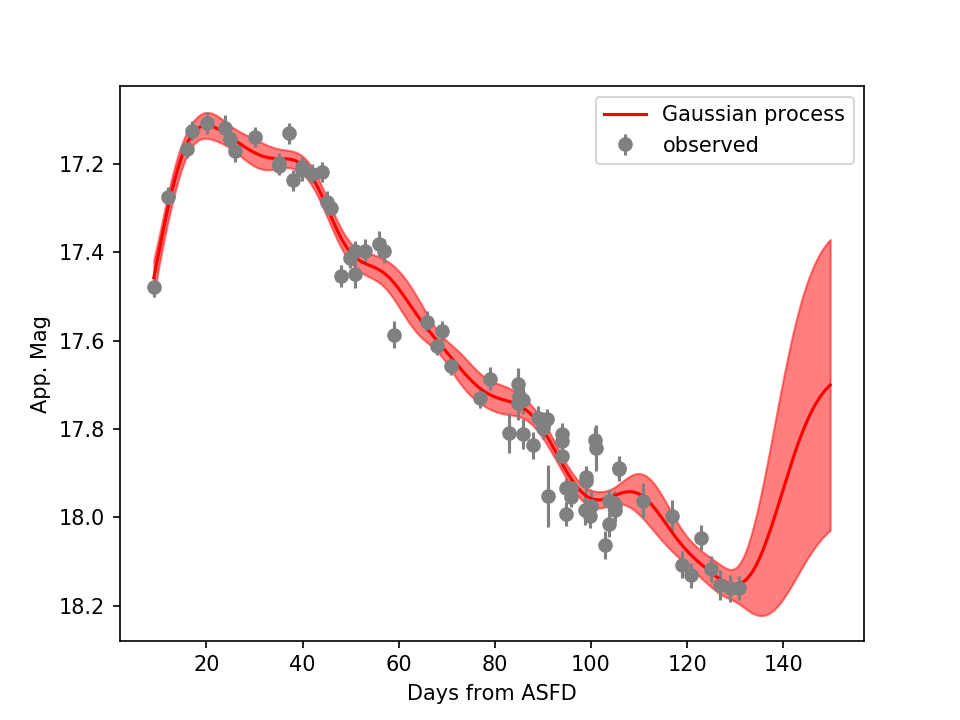

<IPython.core.display.Javascript object>


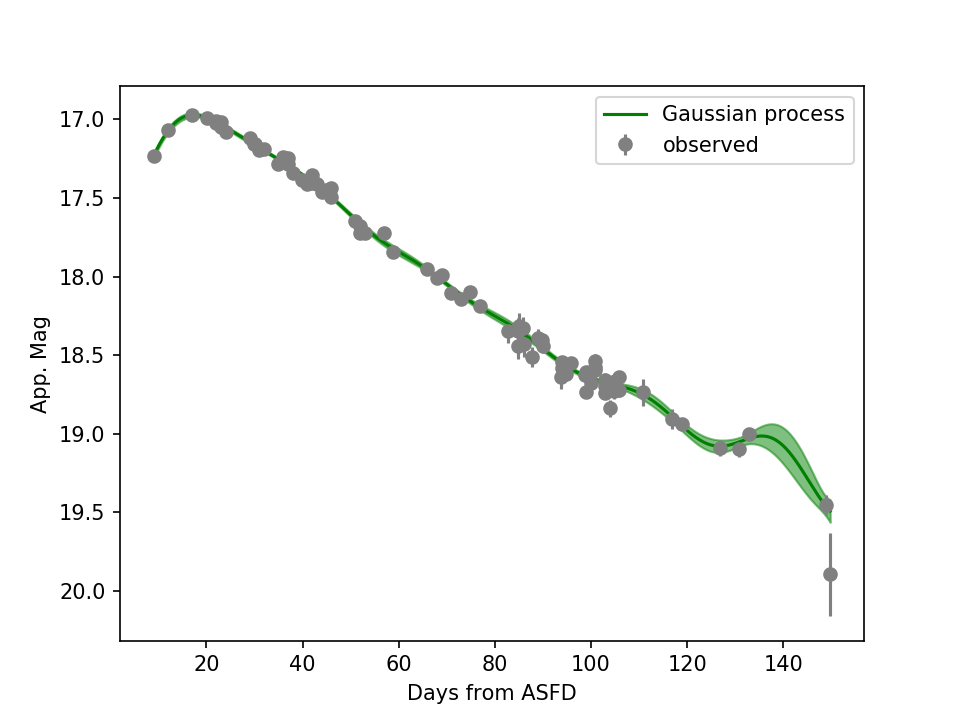

In [17]:
# UNBINNED VERSION

# x = lc['tfrom']
x_fit = np.linspace(min(lc['tfrommarshalfdec']),max(lc['tfrommarshalfdec']),1000)
# y = lc['mag']
# dy = lc['emag']

# RBAND

# lc_r['mag'] -= np.mean(lc_r['mag']) #IMPORTANT STEP, BRING BACK TO "NORMAL" AFTWEWARDS

kernel_r =  np.var(lc_r['mag']) * george.kernels.ExpSquaredKernel(popt_r[0]) #figure out lengthscale in WL space / time space-> max likhood with data Ly44 
gp_r     = george.GP(kernel_r)
gp_r.compute(lc_r['tfrommarshalfdec'], yerr=lc_r['emag']*2)
y_fit_r, y_var_r = gp_r.predict(lc_r['mag'] - np.mean(lc_r['mag']), x_fit, return_var=True) #added here the "back to 0"

y_fit_r += np.mean(lc_r['mag'])

# (1.0, ndim=3, axes=0

plt.figure()
plt.errorbar(lc_r['tfrommarshalfdec'], lc_r['mag'], lc_r['emag'], fmt='o', label='observed', color = 'grey')

h = plt.plot(x_fit, y_fit_r, label='Gaussian process', color = 'red' )
plt.fill_between(x_fit, y_fit_r + np.sqrt(y_var_r), y_fit_r - np.sqrt(y_var_r), alpha=0.5, color=h[0].get_color())

plt.xlabel('Days from ASFD')
plt.ylabel('App. Mag')
plt.gca().invert_yaxis()

plt.legend()


# GBAND
# lc_g['mag'] -= np.mean(lc_g['mag']) 
kernel_g =  np.var(lc_g['mag']) * george.kernels.ExpSquaredKernel(popt_g[0]) #figure out lengthscale in WL space / time space-> max likhood with data Ly44 
gp_g = george.GP(kernel_g)
gp_g.compute(lc_g['tfrommarshalfdec'], lc_g['emag'])
y_fit_g, y_var_g = gp_g.predict(lc_g['mag'] - np.mean(lc_g['mag']), x_fit, return_var=True)

y_fit_g += np.mean(lc_g['mag'])

plt.figure()
plt.errorbar(lc_g['tfrommarshalfdec'], lc_g['mag'], lc_g['emag'], fmt='o', label='observed', color = 'grey')

h = plt.plot(x_fit, y_fit_g, label='Gaussian process', color = 'green' )
plt.fill_between(x_fit, y_fit_g + np.sqrt(y_var_g), y_fit_g - np.sqrt(y_var_g), alpha=0.5, color=h[0].get_color())

plt.xlabel('Days from ASFD')
plt.ylabel('App. Mag')
plt.gca().invert_yaxis()

plt.legend()

Conclusion: maybe need a longer l for kernel, but comes fro the kernel fit 

# Color evolution from the gaussian processed intrapolation 

In [13]:
### FUNCTION FOR THE GLOBAL COLOR EVOLUTION 

def error_on_col_ev(e_g, e_r):
    '''
    this function calculates the error on the color evolution based on the errors extracted from the gaussian process
    
    paramaters
    ----------
    e_r 
    e_g 
    
    
    returns
    -------
    error on the color ev 
    '''
    
    return np.sqrt(e_r**2 + e_g**2)

def col_ev(g,r):
    '''
    this function returns the color difference g-r
    
    parameters
    ----------
    g
    r
    
    
    returns
    ------- 
    color evolution 
    '''
    
    return g-r

In [31]:
y_fit_gmr   = col_ev(y_fit_g, y_fit_r)
e_y_fit_gmr = error_on_col_ev(np.sqrt(y_var_g), np.sqrt(y_var_r))

<IPython.core.display.Javascript object>


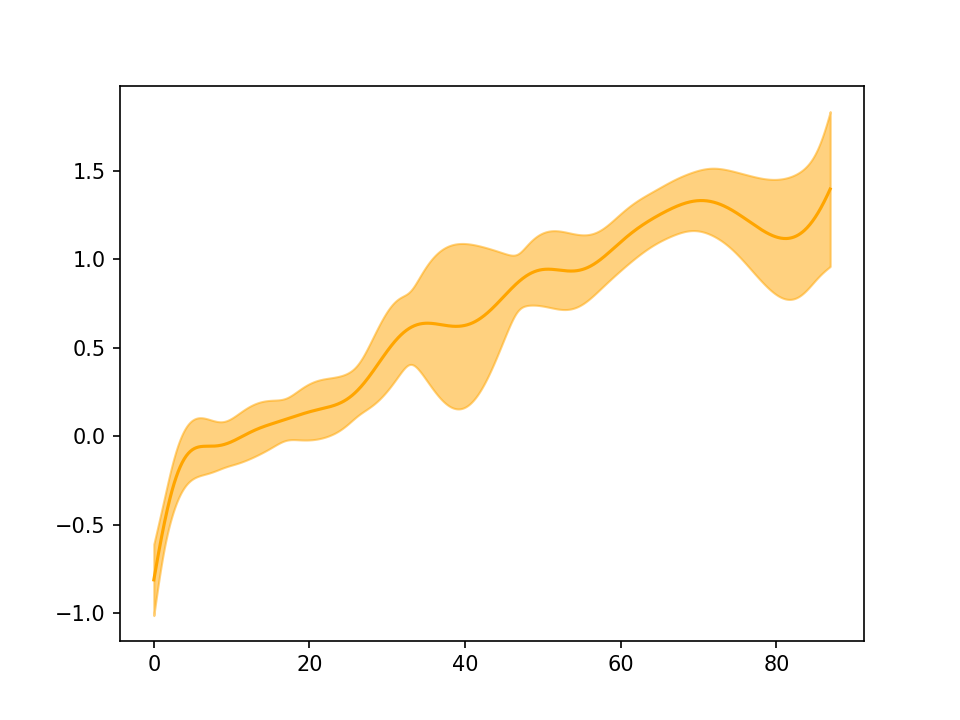

In [32]:
plt.figure()
h = plt.plot(x_fit, y_fit_gmr, label='Gaussian process', color = 'orange' )
plt.fill_between(x_fit, y_fit_gmr + np.sqrt(e_y_fit_gmr), y_fit_gmr - np.sqrt(e_y_fit_gmr), alpha=0.5, color=h[0].get_color())


# For the full batch work and parameters extraction 

Correct for ISM extinction (especially to look for peak mag?) 

correct for redshift? (time wise, especially for typical rise times) 

- need to re-run the forced photometry light curves with these corrections. <b> DONE, can be found at /Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/case_by_case/mag_lc_ex_z_corr/ (magLC) </b>

- the uncorrected light curves will be for the data release <b> DO NOT FORGET TO INCLUDE THE FORGOTTEN ONES <b>

In [17]:
# # BINNED VERSION

# # x = binned_lc['tfrom']
# x_fit = np.linspace(0,150,1000)
# # y = _binned_lc['mag']
# # dy = binned_lc['emag']

# # RBAND
# bined_lc_r['mag'] -= np.mean(bined_lc_r['mag'])
# bkernel_r =  np.var(bined_lc_r['mag']) * george.kernels.ExpSquaredKernel(29) #figure out lengthscale in WL space / time space-> max likhood with data Ly44 
# bgp_r = george.GP(bkernel_r)
# bgp_r.compute(bined_lc_r['tfrommarshalfdec'], bined_lc_r['emag'])
# by_fit_r, by_var_r = bgp_r.predict(bined_lc_r['mag'], x_fit, return_var=True)



# plt.figure()
# plt.errorbar(bined_lc_r['tfrommarshalfdec'], bined_lc_r['mag'], bined_lc_r['emag'], fmt='o', label='observed', color = 'grey')

# h = plt.plot(x_fit, by_fit_r, label='Gaussian process', color = 'red' )
# plt.fill_between(x_fit, by_fit_r + np.sqrt(by_var_r), by_fit_r - np.sqrt(by_var_r), alpha=0.5, color=h[0].get_color())

# plt.xlabel('Days from ASFD')
# plt.ylabel('App. Mag')
# plt.gca().invert_yaxis()

# plt.legend()


# # GBAND

# bkernel_g =  np.var(bined_lc_g['mag']) * george.kernels.ExpSquaredKernel(48) #figure out lengthscale in WL space / time space-> max likhood with data Ly44 
# bgp_g = george.GP(bkernel_g)
# bgp_g.compute(bined_lc_g['tfrommarshalfdec'], bined_lc_g['emag'])
# by_fit_g, by_var_g = gp_g.predict(bined_lc_g['mag'], x_fit, return_var=True)




# plt.figure()
# plt.errorbar(bined_lc_g['tfrommarshalfdec'], bined_lc_g['mag'], bined_lc_g['emag'], fmt='o', label='observed', color = 'grey')

# h = plt.plot(x_fit, by_fit_g, label='Gaussian process', color = 'green' )
# plt.fill_between(x_fit, by_fit_g + np.sqrt(by_var_g), by_fit_g - np.sqrt(by_var_g), alpha=0.5, color=h[0].get_color())

# plt.xlabel('Days from ASFD')
# plt.ylabel('App. Mag')
# plt.gca().invert_yaxis()

# plt.legend()

## Note 1/09/2021 

Check the amplitude estimation: it should be the observation noise, some sort of gaussian noise maybe and not something else...


( Check with Barak)



### Fitting a expsquared to the correlations. 

Negative correlations> becomes anticorrelated. But what does it actually mean (ASK ERAN) 
(use curvefit and all that jazz)


In [54]:
# lc   = ascii.read(forcedphot_maglc+'ZTF18abeajml_mag_fp_lc.ascii')
# lc   = lc[lc['mag']!=99.]
# lc_r = lc[lc['filter']== 'r'] 
# lc_g = lc[lc['filter']== 'g'] 

# '''
# The shift is on the index not the number of days!!!! Need to implement this better
# '''

# fautocorr_mag_r = full_autocorr(lc_r['mag'])
# lags            = np.linspace(0,len(fautocorr_mag_r)-1,len(fautocorr_mag_r))

# # let's take LC with at least 5 points 
# # if len(lc_r) >5:
# #     fautocorr_mag_r = full_autocorr(lc_r['mag'])
# #     plt.plot(fautocorr_mag_r, 'red', alpha = 0.15)
# # if len(lc_g) >5:
# #     fautocorr_mag_g = full_autocorr(lc_g['mag'])
# #     plt.plot(fautocorr_mag_g, 'green', alpha = 0.15)




# popt, pcov = curve_fit(sq_exp, lags, fautocorr_mag_r)

In [61]:
# lagt_r

<IPython.core.display.Javascript object>


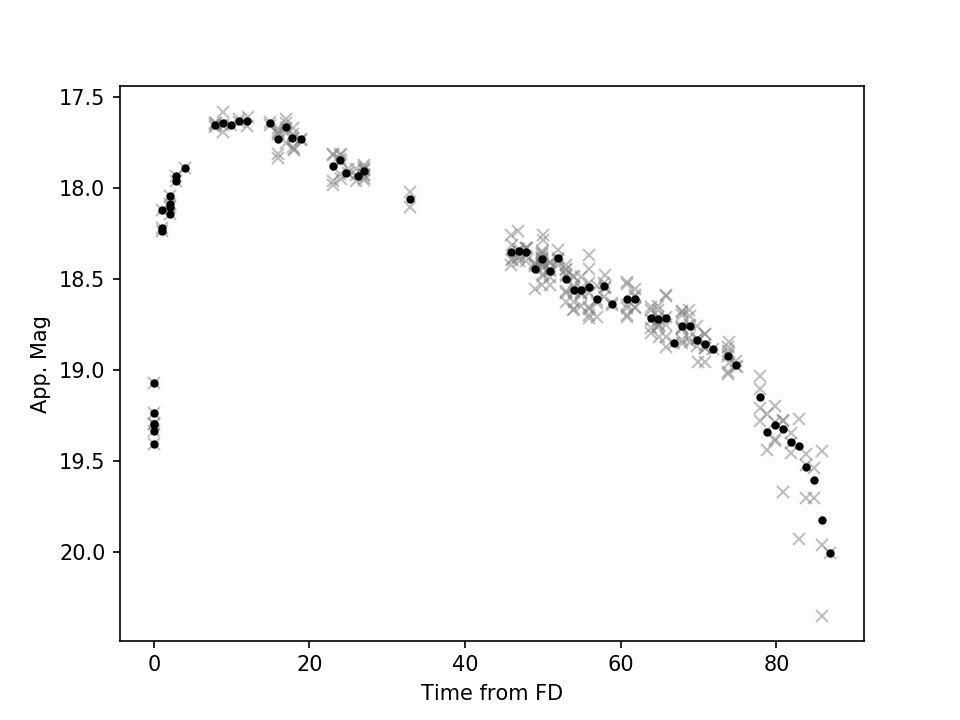

In [60]:
lc   = ascii.read(forcedphot_maglc+'ZTF18abeajml_mag_fp_lc.ascii')
lc   = lc[lc['mag']!=99.]
lc   = lc[lc['tfrommarshalfdec']<=150]
lc   = lc[lc['tfrommarshalfdec']>=-0.5]
lc_r = lc[lc['filter']== 'r'] 
lc_g = lc[lc['filter']== 'g'] 


bined_lc_r = bin_LC(lc_r,4,150,plot=True)
# smooth_lc_r = smooth_LC(lc_r,4,150,sug = 'moving_mu',plot=True)





<IPython.core.display.Javascript object>


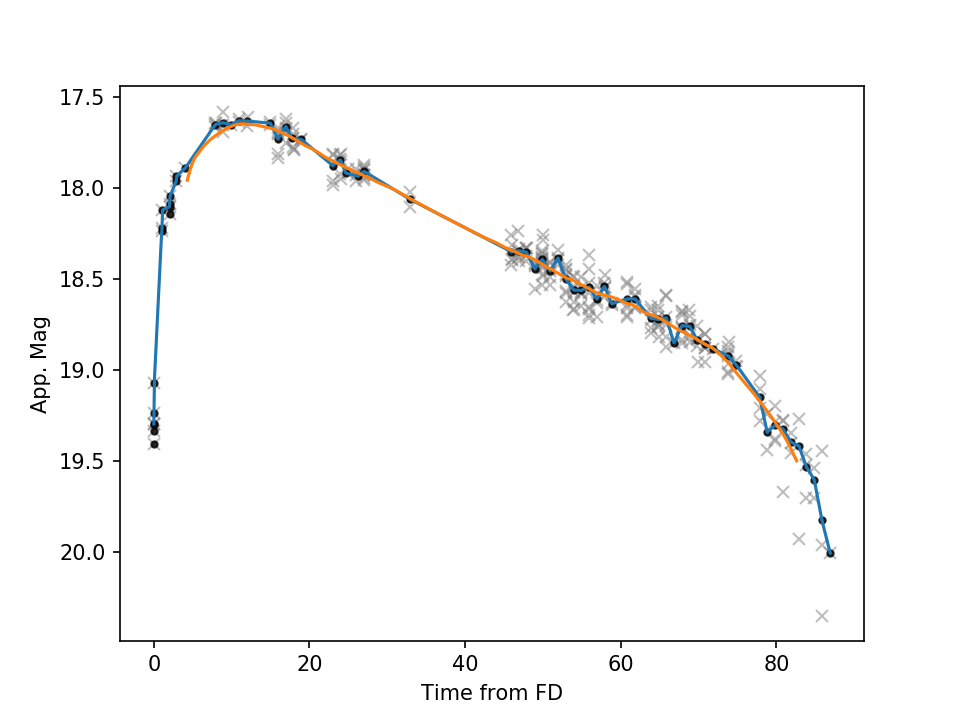

Text(0, 0.5, 'App. Mag')

In [72]:
t_r, mag_r                   = interpolate_LC(bined_lc_r['tfrommarshalfdec'], bined_lc_r['mag'], plot=False)

# when performing the moving average smoothing, need to pad cause it reduces the data... 
smoothed_t_r, smoothed_mag_r = smooth_interpolated_LC(t_r, mag_r) 

plt.figure()
plt.plot(lc_r['tfrommarshalfdec'], lc_r['mag'], 'x', color = 'grey', alpha= 0.5)
plt.plot(bined_lc_r['tfrommarshalfdec'], bined_lc_r['mag'], '.', color = 'black', alpha= 0.8)
plt.plot(t_r, mag_r, '-')
plt.plot(smoothed_t_r, smoothed_mag_r, '-')

plt.gca().invert_yaxis()
plt.xlabel('Time from FD')
plt.ylabel('App. Mag')





In [ ]:
# AUTOCORRELATE AND THEN FIT 



lagt_r , autoco_r = autocorrelate_LC(smoothed_t_r,smoothed_mag_r)

# let's take LC with at least 5 points 
# if len(lc_r) >5:
#     fautocorr_mag_r = full_autocorr(lc_r['mag'])
#     plt.plot(fautocorr_mag_r, 'red', alpha = 0.15)
# if len(lc_g) >5:
#     fautocorr_mag_g = full_autocorr(lc_g['mag'])
#     plt.plot(fautocorr_mag_g, 'green', alpha = 0.15)


lagt_r   = np.array(lagt_r)
autoco_r = np.array(autoco_r)

popt, pcov = curve_fit(sq_exp, lagt_r, autoco_r)

# Comment: maybe it's not a squared exponential?

I do not want to spend to much time here since it won't change much. I will stick with the squared explonential, but I want a better shape. 

<IPython.core.display.Javascript object>


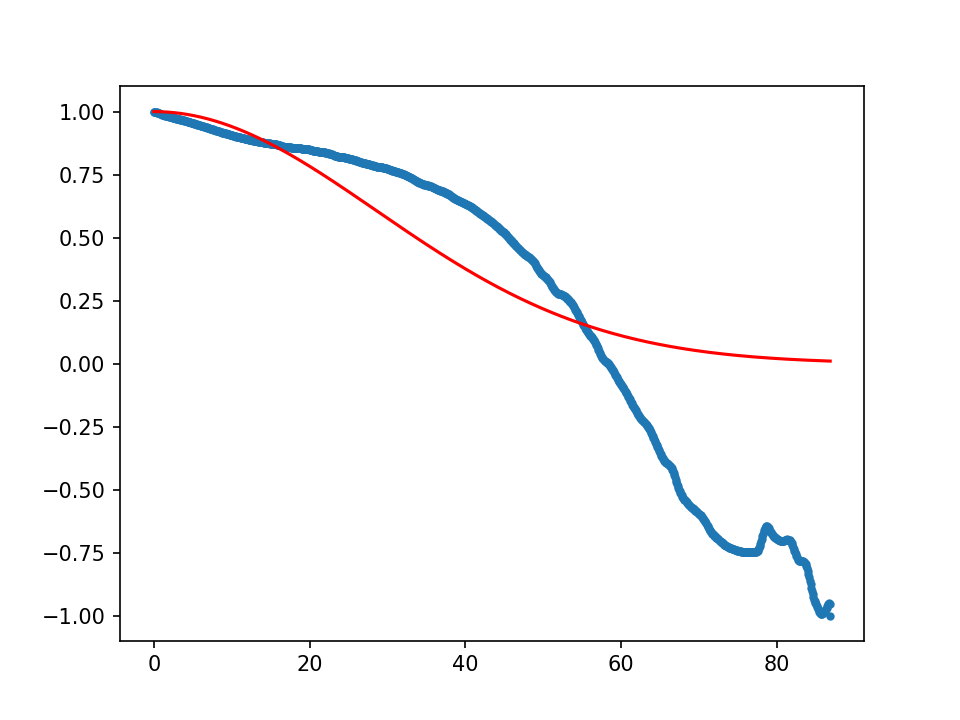

In [38]:
plt.figure()
plt.plot(lagt_r, autoco_r, '.')
plt.plot(lagt_r, sq_exp(lagt_r, *popt), 'r-')

Why does it become negative after 15 days? -> anticorrelated

Should cut the fit when it becomes anticorrelated?

# Test subject

In [5]:
test = ascii.read('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/case_by_case/mag_lc/ZTF18abdbysy_mag_fp_lc.ascii')

In [6]:
test

<Table length=1352>
       jd        tfrommarshalfdec    mag     emag        limmag       filter
    float64          float64       float64 float64      float64        str1 
--------------- ------------------ ------- ------- ------------------ ------
2458198.8627083 -96.85809169989079    99.0    99.0 20.778844356829698      r
2458198.8874884 -96.83331159967929    99.0    99.0 20.825538551699083      r
2458198.9053125 -96.81548749981448    99.0    99.0 20.936296608799772      r
2458198.9298843 -96.79091569967568    99.0    99.0 20.961199353644805      r
2458198.9770023 -96.74379769992083    99.0    99.0 20.642296920707178      r
2458198.9824306 -96.73836939968169    99.0    99.0 20.828254396325665      r
2458203.8690046 -91.85179539956152    99.0    99.0   20.5983011803184      g
2458203.9051157 -91.81568429991603    99.0    99.0 20.833849935972882      g
2458203.9108449 -91.80995509959757    99.0    99.0 20.930754656826352      g
2458204.8777778 -90.84302219981328    99.0    99.0 20.304836822349685      g
            ...                ...     ...     ...                ...    ...
2459307.9021644 1012.1813644003123    99.0    99.0  20.83295344979706      r
2459307.9550579 1012.2342579001561    99.0    99.0 20.980732305446335      g
2459309.8250116 1014.1042116000317    99.0    99.0 20.948099078525665      g
2459309.9078009 1014.1870009000413    99.0    99.0 20.878629635416054      r
2459311.8683218 1016.1475218003616    99.0    99.0 21.301068772836675      g
 2459311.975544 1016.2547440002672    99.0    99.0  20.93580630224058      r
 2459313.925625 1018.2048250003718    99.0    99.0 20.143993821157544      r
2459313.9728241 1018.2520241001621    99.0    99.0 20.845637748620227      g
2459315.8039352 1020.0831352001987    99.0    99.0  20.60933784521332      g
2459317.9718287  1022.251028700266    99.0    99.0  21.25781907233982      g

In [13]:
det_test = test[test['mag']!=99.]

In [14]:
det_test_r = det_test[det_test['filter']=='r']
det_test_g = det_test[det_test['filter']=='g']

<IPython.core.display.Javascript object>


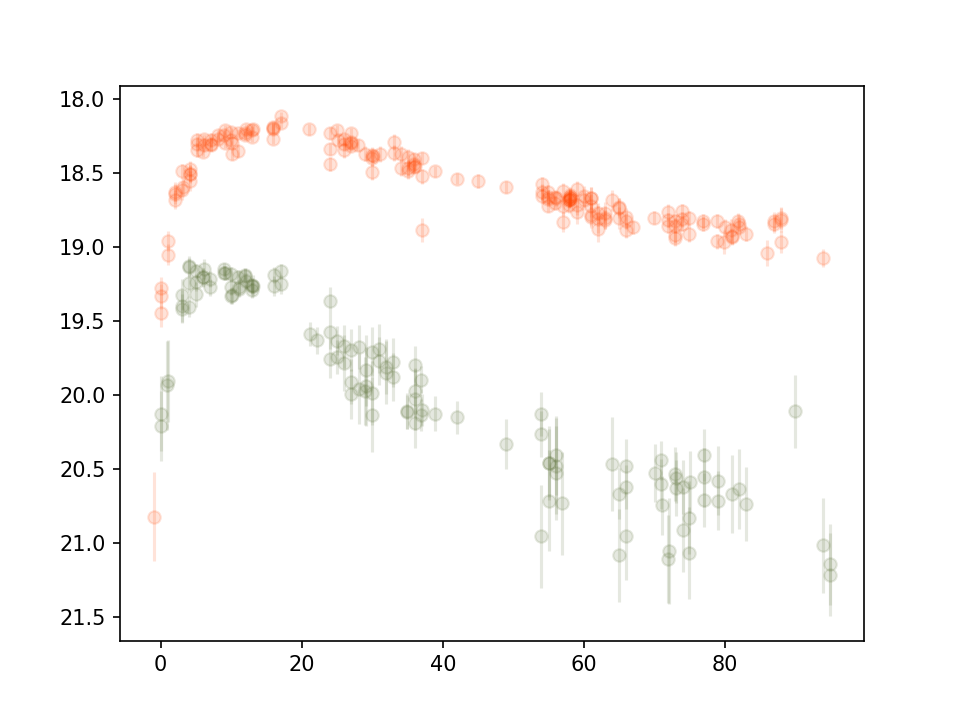

In [15]:
plt.figure()
plt.errorbar(det_test_r['tfrommarshalfdec'], det_test_r['mag'], det_test_r['emag'],
             fmt='o', alpha = 0.15,color = 'orangered'
            )
plt.errorbar(det_test_g['tfrommarshalfdec'], det_test_g['mag'], det_test_g['emag'],
             fmt='o', alpha = 0.15,color = 'darkolivegreen'
            )

plt.gca().invert_yaxis()

In [74]:
# t_r, mag_r = interpolate_LC(det_test_r['tfrommarshalfdec'], det_test_r['mag'], plot = True)

In [73]:
# lagt_r , autoco_r = autocorrelate_LC(t_r,mag_r, plot = True)

Trying not to use the autocorrelation function of numpy since it actually convolves? 


What about binning? actually no, I don't want to lose any information at that stage... 

In [12]:
# def autocorr(x, t=1):
#     '''
#     this function computes the autocorrelation of the magnitude 
    
#     parameters
#     ----------
#     x [array] array of magnitudes. (in order of time series)
#     t [int?]  lag for the autocorrelation. by default 1 day since 1 day cadence
    
#     returns
#     -------
    
    
#     '''
#     return np.corrcoef(np.array([x[:-t], x[t:]])) #that's for one value ?

In [47]:
# def full_autocorr(x):
#     '''
#     this function computes the autocorrelation of the magnitude 
#     The code goes through an array of  time shifts (of one day) and
#     computes the Pearson product-moment correlation coefficients (see numpy doc)
    
#     parameters
#     ----------
#     x [array] array of magnitudes. (in order of time series)

    
#     returns
#     -------
    
    
#     '''
# #     x = np.array(x)
#     _autoco = []
    
#     for shift in range(len(x) - 1):
#         if shift == 0 :
#             autoco = np.corrcoef( np.array([x , x]) )[0,1]
#             _autoco.append(autoco)
            
#         else:
#             autoco = np.corrcoef( np.array([x[:-shift] , x[shift:]]) )[0,1]
#             _autoco.append(autoco)
    
    
#     return  _autoco

In [19]:
# def full_autocorr_vmod(x):
#     '''
#     this function computes the autocorrelation of the magnitude 
    
#     parameters
#     ----------
#     x [array] array of magnitudes. (in order of time series)

    
#     returns
#     -------
    
    
#     '''
# #     x = np.array(x)
#     _autoco = []
    
#     for shift in range(1,len(x)-1):
       
#         autoco = np.corrcoef( np.array([x[:-shift] , x[shift:]]) )[0,1]
#         _autoco.append(autoco)
    
    
#     return  _autoco

In [32]:
# fautocorr_mag_r = full_autocorr(det_test_r['mag'])
# fautocorr_mag_g = full_autocorr(det_test_g['mag'])

In [31]:
# fautocorr_mag

In [23]:
# plt.figure()
# plt.plot(fautocorr_mag_r)
# plt.plot(fautocorr_mag_g)

In [14]:
# np.corrcoef(np.array([det_test_g['mag'][:-0] , det_test_g['mag'][0:]]))

# FUNCTIONS 

## /!\ NOTE from 05/12/2021: all these functions are supposedly existent in "functions_4_gp.py" 


## Making a lag of 1 day and not index... 

- bin the data? 
- when performing the lag, compute the time difference and save it as the lag time (< I think it's the most reliable?)


In [7]:
# def autocorrelate_LC(t,mag, plot = False, table = False):
#     '''
#     this function computes the autocorrelation of the magnitude 
#     The code goes through an array of  time shifts (of one day) and
#     computes the Pearson product-moment correlation coefficients (see numpy doc)
    
#     > should take as input both the time and the magnitude
#     > time should be a "linear space" (equally spaced) array and magnitudes should be the interpolation of the LC 
    
#     parameters
#     ----------
#     t     [array] interpolated time SHOULD HAVE EQUALLY SPACED T 
#     mag   [array] interpolated magnitude 
#     plot  [bool] -optional- plot the autocorrelation 
#     table [bool] -optional- if you want to return it in a table format
    
#     returns
#     -------
#     two arrays: lags and the autocorrelation
    
#     omelette du fromage
    
#     '''

#     _autoco = []
#     _laggy  = []
    
#     for shift in range(len(mag) - 1):
#         if shift == 0 :
#             autoco = np.corrcoef( np.array([mag , mag]) )[0,1]
#             _autoco.append(autoco)
#             _laggy.append(0)
            
#         else:
#             autoco = np.corrcoef( np.array([mag[:-shift] , mag[shift:]]) )[0,1]
#             diff_T = t[shift]-t[0]
#             _autoco.append(autoco)
#             _laggy.append(diff_T)
    

    
#     if plot is True:
#         plt.figure()
#         plt.plot(_laggy,_autoco)
#         plt.xlabel("Lags [days]")
#         plt.xlabel("N-P correlation coef.")
    
#     if table is True: 
#         _taby = Table([_laggy, _autoco], names = ('lags', 'autocorrelation'))
#         return _taby
#     elif table is False:
#         return  _laggy, _autoco

In [10]:
# def full_autocorr_realagtime(t,mag):
#     '''
#     this function computes the autocorrelation of the magnitude 
#     The code goes through an array of  time shifts (of one day) and
#     computes the Pearson product-moment correlation coefficients (see numpy doc)
    
#     > should take as input both the time and the magnitude
#     > time should be a "linear space" (equally spaced) array and magnitudes should be the interpolation of the LC 
    
#     parameters
#     ----------
#     x [array] array 2 col x rows of time and magnitudes. (in order of time series)

    
#     returns
#     -------
    
    
#     '''

#     _autoco = []
#     _laggy  = []
    
#     for shift in range(len(x) - 1):
#         if shift == 0 :
#             autoco = np.corrcoef( np.array([x['mag'] , x['mag']]) )[0,1]
#             _autoco.append(autoco)
#             _laggy.append(0)
            
#         else:
#             autoco = np.corrcoef( np.array([x['mag'][:-shift] , x['mag'][shift:]]) )[0,1]
#             diff_T = x['tfrommarshalfdec'][shift]-x['tfrommarshalfdec'][0]
#             _autoco.append(autoco)
#             _laggy.append(diff_T)
    
    
#     return  _laggy, _autoco

In [8]:
# def interpolate_LC(t,mag,len_interpo = 1000, plot='False'):
#     '''
#     this function interpolates the lightcurve prior to computing the autocorrelation
#     Recommend to cut the lightcurve to <150 days 
    
#     parameters
#     ----------
#     t           [column/array] original column/array of time
#     mag         [column/array] original column/array of magnitudes
#     len_interpo [int] -optional- len of the interpolated light curve. Can be changed according to number of points
#     plot        [bool] -optional- plot the lightcurve to visualise the interpolation
    
#     returns
#     -------
#     array of time, array of interpolated magnitudes 
    
#     '''
    
#     interp_mag = interp1d(t, mag,   bounds_error=False, fill_value='nan')
#     interp_t   = np.linspace(min(t), max(t), 1000)
    
    
    
#     if plot is True:
#         plt.figure()
#         plt.plot(t,mag,'.')
#         plt.plot(interp_t, interp_mag(interp_t),'-')
#         plt.gca().invert_yaxis()
#         plt.xlabel('Time from FD')
#         plt.ylabel('App. Mag')
    
#     return interp_t, interp_mag(interp_t)

In [9]:
# ## The gaussian process interpolation function

# def gp_interp_lc(lc, popt):
#     '''
#     This function performs the guassian process interpolaiton based on the kernel size fitted before
    
#     parameters
#     ----------
#     lc      [astropy table] magnitude light curve (tfrommarshalfdec, mag, e_mag)
#     popt    [array/list]    the parameters from the fir of the kernel to the autocorrelation
    
#     returns
#     -------
#     gp_fit  [astropy table] the GP interpolated fit
    
#     '''
#     # time scale over which we're interpolating
#     x_fit  = np.linspace(min(lc['tfrommarshalfdec']),max(lc['tfrommarshalfdec']),1000)
    
#     # introducing the parameters of the kernel we fit earlier
#     kernel =  np.var(lc['mag']) * george.kernels.ExpSquaredKernel(popt[0]) 
    
#     # generating and computing the GP
#     gp     = george.GP(kernel)
#     gp.compute(lc['tfrommarshalfdec'], yerr=lc['emag']*2)
    
#     # applying the GP to the LC
#     # NOTE: the GP wants to go to "0" (defined mean)
#     # , hence we need to put the data arounbd a mean of zero. We add back the mean of the LC afterwards
#     y_fit, y_var = gp_r.predict(lc['mag'] - np.mean(lc['mag']), x_fit, return_var=True) #added here the "back to 0"
#     y_fit       += np.mean(lc['mag'])
    
#     gp_fit = Table([x_fit, y_fit, y_var], names = ('gp_time', 'gp_mag', 'gp_e_mag'))
    
#     return gp_fit
    
    
    
    
    
    
    
    
    
    
    
    
    
# # plt.figure()
# # plt.errorbar(lc_r['tfrommarshalfdec'], lc_r['mag'], lc_r['emag'], fmt='o', label='observed', color = 'grey')

# # h = plt.plot(x_fit, y_fit_r, label='Gaussian process', color = 'red' )
# # plt.fill_between(x_fit, y_fit_r + np.sqrt(y_var_r), y_fit_r - np.sqrt(y_var_r), alpha=0.5, color=h[0].get_color())

# # plt.xlabel('Days from ASFD')
# # plt.ylabel('App. Mag')
# # plt.gca().invert_yaxis()

# # plt.legend()

    

# Smoothing research 


## /!\ All these functions are now encapsulated in "functions_4_gp.py" /!\ 


How to smoothe data: 
The basic way is to go for binning the data. It might howveer not be enough. 


Exploring Savitsky-Golay snoothing filters. 
There's also the moving average (through convolving?) 

comment about moving average: I think it relevant for evenly sampled data such as spectra, and is good to remove noise. Regarding light curves, I assume that binning might actually be more acurate and more informative. 

However, we can use the moving average on the interpolated data (which in this case IS evenly sampled, and we can play on the sampling with the interpolation.

In [2]:
# def bin_LC(table, day_min, day_max, sug = 'mean', plot = False):
#     '''
#     This function smoothes the magnitude light curve (considering only the detections)
#     Three types: mean binning, median binning and moving average
    
#     parameters
#     ----------
#     table     [table] containing time and mag
#     day_min   [int]   
#     day_max   [int]
#     sug       [string] -optional- 'mean', 'median'
#     plot
    
#     returns
#     -------
    
    
#     '''
    
#     bin_phot_table_ = table[['tfrommarshalfdec','mag','emag']][ table['tfrommarshalfdec'] < day_min ]
#     if sug == 'mean':
#         for i in range(day_min,day_max, 1):
#             temp_phot_ =   table[['tfrommarshalfdec', 'mag','emag']][ (i <= table['tfrommarshalfdec']) & (table['tfrommarshalfdec'] < i+1) ]
#             if len(temp_phot_) == 1:
#                 mu_time  = temp_phot_['tfrommarshalfdec'][0]
#                 mu_mag   = temp_phot_['mag'][0]
#                 sig_mag  = temp_phot_['emag'][0]

#                 bin_phot_table_.add_row([ mu_time , mu_mag , sig_mag ] )
                
#             if len(temp_phot_) > 1:
#                 mu_time  = np.average(temp_phot_['tfrommarshalfdec'])
#                 mu_mag   = get_weighted_mean( np.array(temp_phot_['mag']), np.array(temp_phot_['emag']) )
#                 sig_mag  = get_std_err_wmean(np.array(temp_phot_['mag']), np.array(temp_phot_['emag']) )

#                 bin_phot_table_.add_row([ mu_time , mu_mag , sig_mag ] )

#     elif sug == 'median':
#         for i in range(day_min,day_max, 1):
#             temp_phot_ =   table[['tfrommarshalfdec', 'mag', 'emag']][ (i <= table['tfrommarshalfdec']) & (table['tfrommarshalfdec'] < i+1) ]
#             if len(temp_phot_) == 1:
#                 mu_time  = temp_phot_['tfrommarshalfdec'][0]
#                 mu_mag   = temp_phot_['mag'][0]
#                 sig_mag  = temp_phot_['emag'][0]

#                 bin_phot_table_.add_row([ mu_time , mu_mag , sig_mag ] )
               
            
#             if len(temp_phot_) > 1:
#                 mu_time_     = np.average(temp_phot_['tfrommarshalfdec'])
#                 mu_flux_     = np.median( np.array(temp_phot_['mag']) )
#                 sig_mag      = get_std_err_wmean( np.array(temp_phot_['mag']), np.array(temp_phot_['emag']) )


#                 bin_phot_table_.add_row([ mu_time , mu_mag , sig_mag ] )
                
# #     elif sug == 'moving_mu':
# #         temp_phot_ =   table[['tfrommarshalfdec', 'mag', 'emag']][ (day_min <= table['tfrommarshalfdec']) & (table['tfrommarshalfdec'] < day_max) ]
        
# #         if len(temp_phot_) == 1:
# #             mu_time  = temp_phot_['tfrommarshalfdec'][0]
# #             mu_mag   = temp_phot_['mag'][0]
# #             sig_mag  = temp_phot_['emag'][0]

# #             bin_phot_table_.add_row([ mu_time , mu_mag , sig_mag ] )
            
# #         if len(temp_phot_) > 3 :
# #             mu_time  = moving_average(temp_phot_['tfrommarshalfdec'])
# #             mu_mag   = moving_average(temp_phot_['mag'])
# #             sig_mag  = moving_average(temp_phot_['emag'])
            
# #             temp_ave = Table({'tfrommarshalfdec': mu_time, 'mag': mu_mag, 'emag': sig_mag},
# #                              names=('tfrommarshalfdec', 'mag', 'emag'))
            
            
            
            
# #             bin_phot_table_ = vstack([bin_phot_table_, temp_ave ])
        
        
        

                
#     if plot is True:
#         plt.figure()
#         plt.plot(table['tfrommarshalfdec'],table['mag'],'x', color = 'grey', alpha = 0.5)
#         plt.plot(bin_phot_table_['tfrommarshalfdec'],bin_phot_table_['mag'],'.', color = 'black')
#         plt.gca().invert_yaxis()
#         plt.xlabel('Time from FD')
#         plt.ylabel('App. Mag')

#     return bin_phot_table_

In [11]:
# def smooth_interpolated_LC(time,magnitude, n = 100):
#     '''
#     this function smoothes the interpolation of the light curve using a moving average function.
#     The data needs to be interpolated first in order to have a constant sampling of the light curve (artificial but
#     necessary)
    
#     parameters
#     ----------
#     time       [array] 
#     magnitude  [array]
    
#     returns
#     -------
    
#     '''
    
#     smooth_time = moving_average(time, n = n)
#     smooth_mag  = moving_average(magnitude, n = n)
    
#     return smooth_time, smooth_mag
    
    

In [14]:
# def savitzky_golay(spec):
#     '''
#     this function smoothes the LC using the SG technique. 
#     '''

   
#     x  = spec[:,0] 
#     y = spec[:,1] / spec[:,1].mean()
    
    
    
#     # Find residuals from smooth line

    
#     smooth = mf.savgol_filter(y, 31, 3 )
#     resid = y - smooth
    
    
#     # Calculate the variance 
# #     
    
# #     def moving_average(a, n=3) :
# #         ret = np.cumsum(a, dtype=float)
# #         ret[n:] = ret[n:] - ret[:-n]
# #         return ret[n - 1:] / n
    
    
    
#     mov_var = moving_average(resid**2, n=100)
#     mov_var = np.concatenate((mov_var, [mov_var[-1]]* (resid.size-mov_var.size)))
#     err_std = mov_var**(1/2)
 
#     return np.array([x,err_std]).T 

In [1]:
# def get_weighted_mean(val, e_val):
#     '''
#          this function computes the weighted mean of an esemble of points assuming that they are distributed following a normal distribution
    
#         parameters
#         ----------
#         val      [numpy array] collection of values (e.g. magnitude, flux)
#         e_val    [numpy array] collection of errors on the sus-mentioned values
#         /!\ they need to be the same length 
    
#         returns
#         -------
#         mu    [float] weighted mean
#     '''
    
#     num_   = np.sum(val/(e_val**2))
#     denom_ = np.sum(1/(e_val**2))

#     return num_/denom_


# def moving_average(a, n=20) :
#     '''
#     this function computes the moving average over n index shift (by default 3)
    
#     parameters
#     ----------
#     a [array/column] 
#     n [int]
    
#     returns
#     -------
#     smoothed data
    
#     '''
#     ret     = np.cumsum(a, dtype=float)
#     ret[n:] = ret[n:] - ret[:-n]
#     return ret[n - 1:] / n


# def get_std_err_wmean(vals,err):
# #
#     '''
#     computes the standard error of the weighted mean 
    
#     parameters
#     ----------
#     err : array of errors values
    
#     returns
#     -------
#     the standard error of the weighted mean
#     '''
#     _muweigt = get_weighted_mean(vals,err)
    
#     _weights = 1/(err**2)
    
#     _var     = (np.sum(_weights*(vals**2))/np.sum(_weights) - _muweigt**2 )*(len(vals)/(len(vals)-1))
    
#     return np.sqrt(_var/len(vals))

## Part III of GP exploration 

> Perform a Chi2 test between the following ideas: 
- One autocorrelation length 
- two autocorrelation length (with the breaking point being either t_break OR t_peak)
- a non-stationnary kernel (harder to test...) 


> Need to have lightcurves from EED 



Once done, one can extract the following behaviour: rise until half peak mag, decline rate from peak mag and color evolution. 



In [4]:
sample_table = ascii.read('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/tables/RISNeII_radeczeztexpflash_23112021.csv', delimiter = ',')

In [5]:
# sample_table.show_in_browser()

In [6]:
peak_mag_table = ascii.read('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/peak_mag/peak_mag_fulinfantsample_23112021.ascii', delimiter=',')

### Defining a subsample to test the different hypothesis 

Choosing by hand: 5 per year, random. Subsample of 15 candidates.. 

In [7]:
subsamp = ['ZTF18aaaibml', 'ZTF18aarpttw', 'ZTF18abcezmh', 'ZTF18abcptmt', 'ZTF18absldfl',
           'ZTF19aavbkly', 'ZTF19abegizf', 'ZTF19abqhobb', 'ZTF19abjioie', 'ZTF19abyuzch',
           'ZTF20aazpphd', 'ZTF20ablygyy', 'ZTF20abupxie', 'ZTF20acklcyp', 'ZTF20abybeex']

In [8]:
subsamp_table      = vstack([x for x in sample_table if x['name'] in subsamp])
subsamp_peak_table = vstack([x for x in peak_mag_table if x['name'] in subsamp])

ZTF18aarpttw


<IPython.core.display.Javascript object>


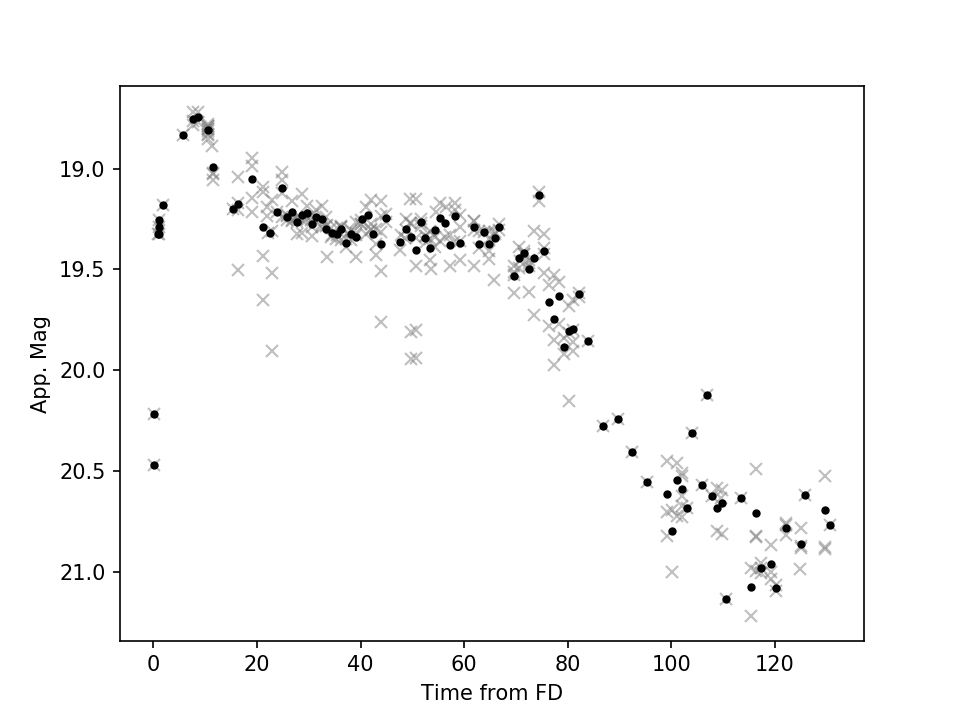

<IPython.core.display.Javascript object>


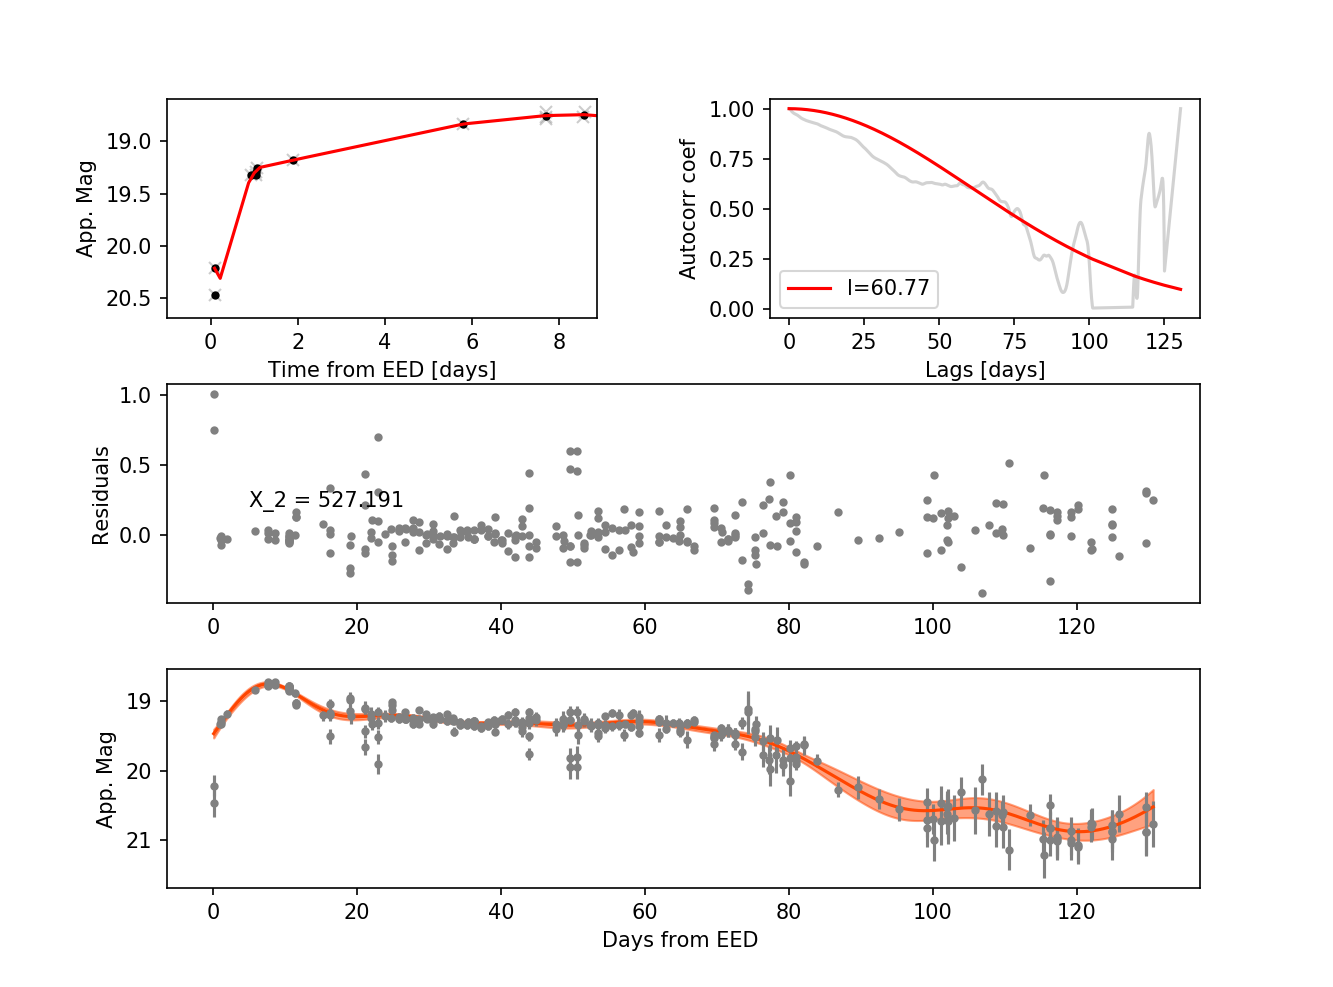

<IPython.core.display.Javascript object>


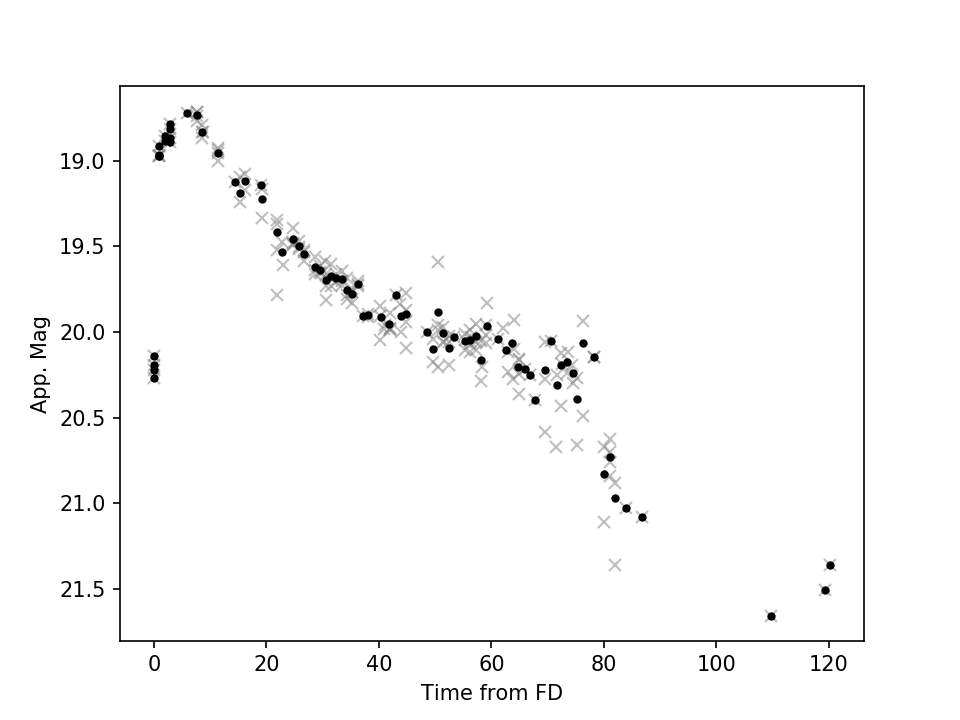

<IPython.core.display.Javascript object>


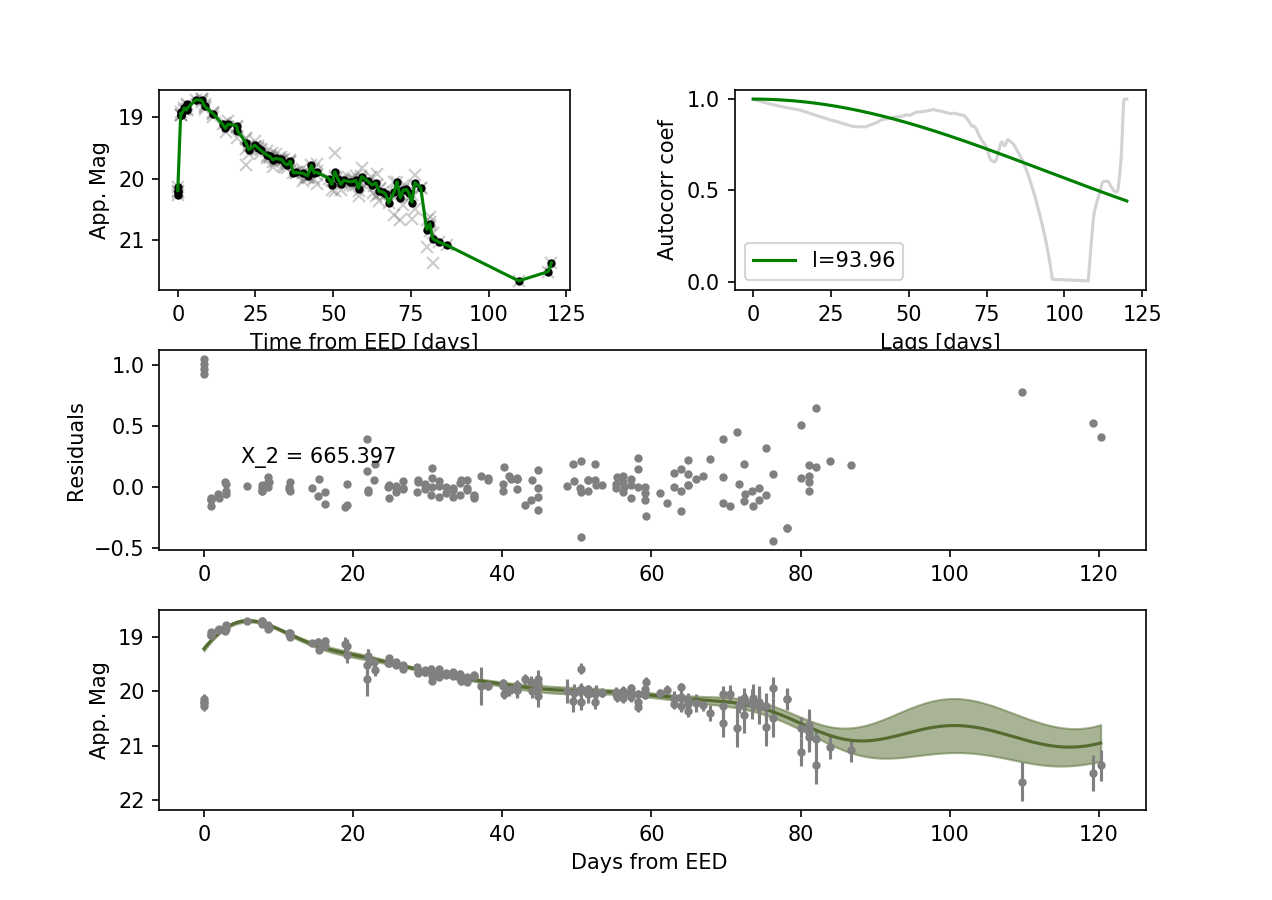

In [12]:
for candiname in subsamp_table['name'][1:2]:

    print(candiname)

    lc   = ascii.read(forcedphot_maglc+f'{candiname}_mag_fp_lc_exzcorr.ascii')

    # remove non detections 
    lc   = lc[lc['mag']!=99.]

    # restrain light curve in time
    lc   = lc[lc['tfromexplo_zc']<=180]
    lc   = lc[lc['tfromexplo_zc']>=-1]

    # attention aux conditions de s'il existe observations dans le filtre, etc... 


    ############## RED BAND
        
    gp_lc_r = perform_gp_plot_full(lc,'r')

   
    ############## GREEN BAND
    
    gp_lc_g = perform_gp_plot_full(lc, 'g')
        

    
    
    gp_lc = hstack(gp_lc_r,gp_lc_g)



ZTF18aarpttw


<IPython.core.display.Javascript object>


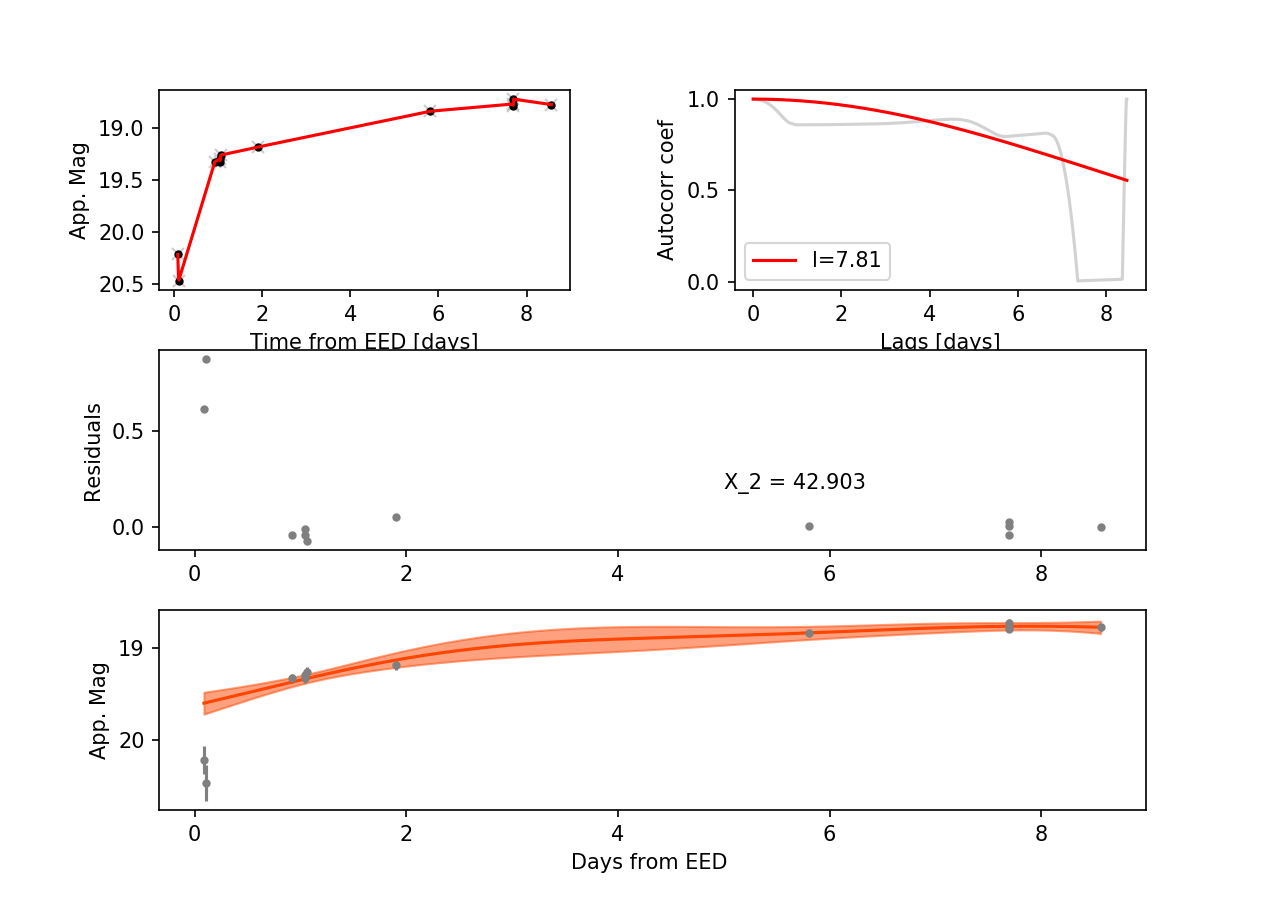

<IPython.core.display.Javascript object>


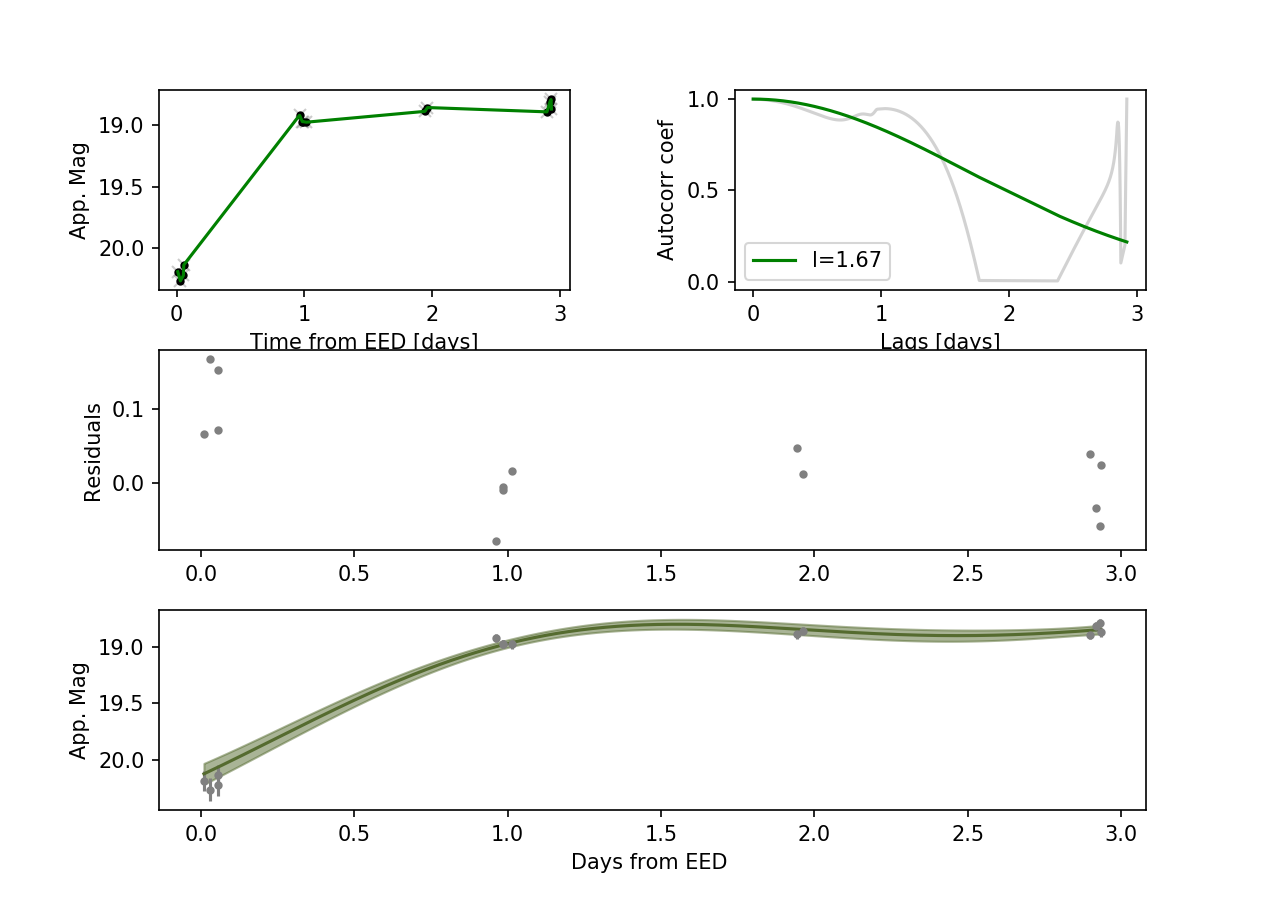

In [13]:
for candiname in subsamp_table['name'][1:2]:

    print(candiname)
    candi_peak = peak_mag_table[peak_mag_table['name']==candiname]

    lc   = ascii.read(forcedphot_maglc+f'{candiname}_mag_fp_lc_exzcorr.ascii')

    # remove non detections 
    lc   = lc[lc['mag']!=99.]

    # restrain light curve in time
    lc   = lc[lc['tfromexplo_zc']<=180]
    lc   = lc[lc['tfromexplo_zc']>=-1]

    # attention aux conditions de s'il existe observations dans le filtre, etc... 


    ############## RED BAND
    peak_r   = candi_peak[candi_peak['filter']=='r']
    t_peak_r = peak_r['pday'][0] 
        
    gp_lc_r = perform_gp_plot_by_parts(lc,'r', peak_time = t_peak_r, part = 'rise')

   
    ############## GREEN BAND
    
    peak_g   = candi_peak[candi_peak['filter']=='g']
    t_peak_g = peak_g['pday'][0]
    
    gp_lc_g = perform_gp_plot_by_parts(lc, 'g', peak_time = t_peak_g, part = 'rise')
        

    
    
#     gp_lc = hstack(gp_lc_r,gp_lc_g)



ZTF18aarpttw


<IPython.core.display.Javascript object>


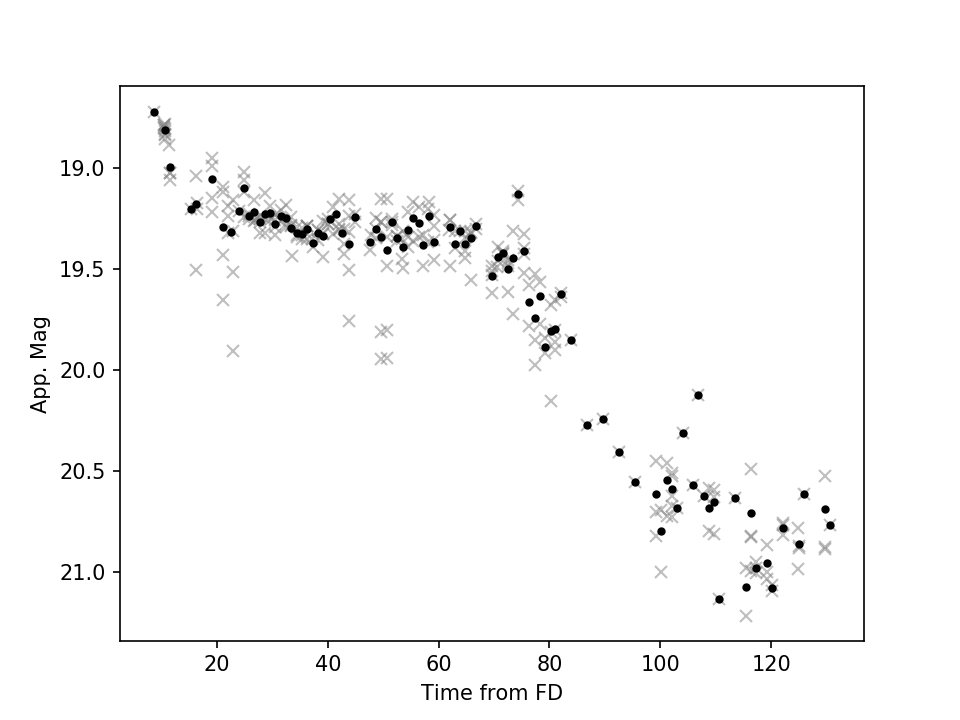

<IPython.core.display.Javascript object>


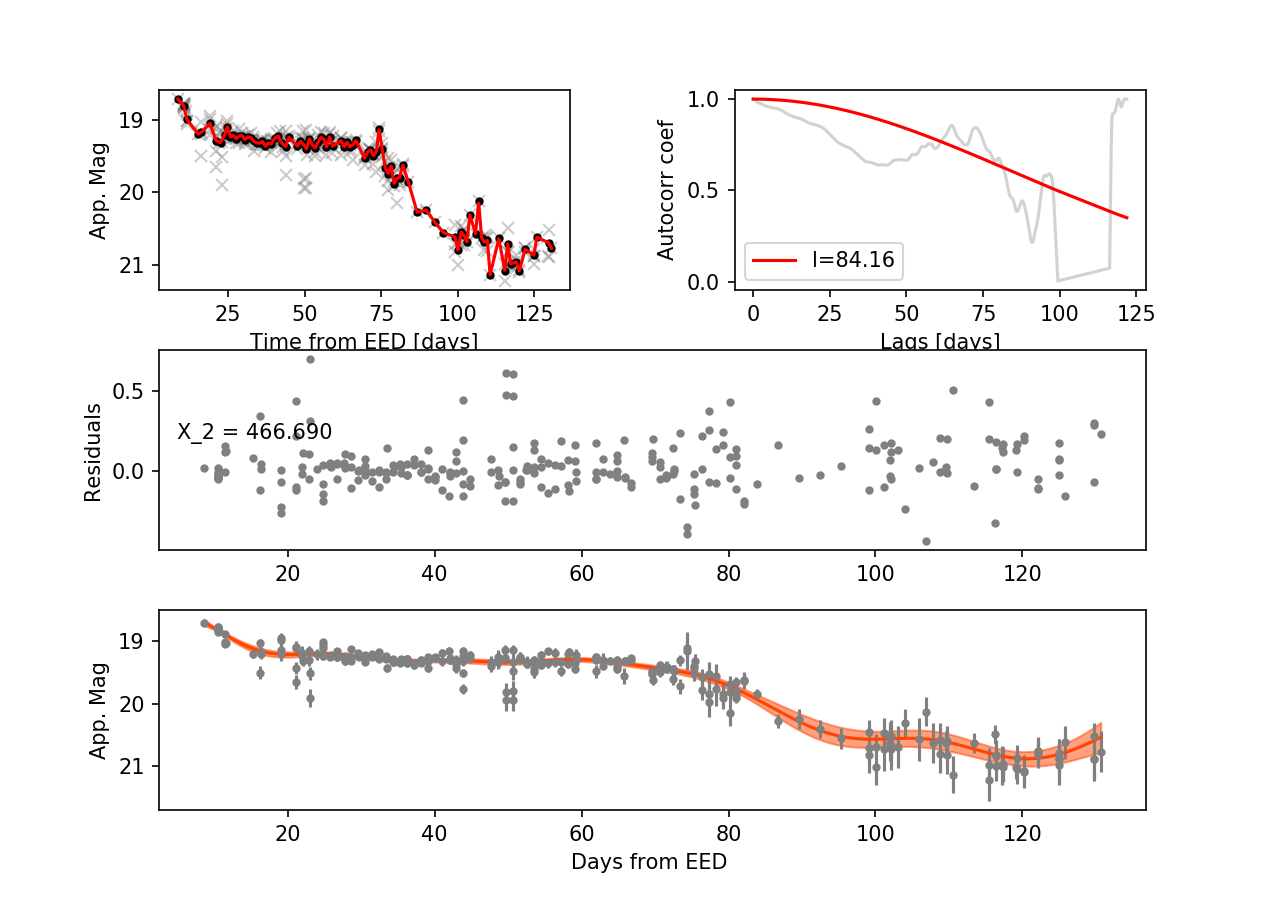

<IPython.core.display.Javascript object>


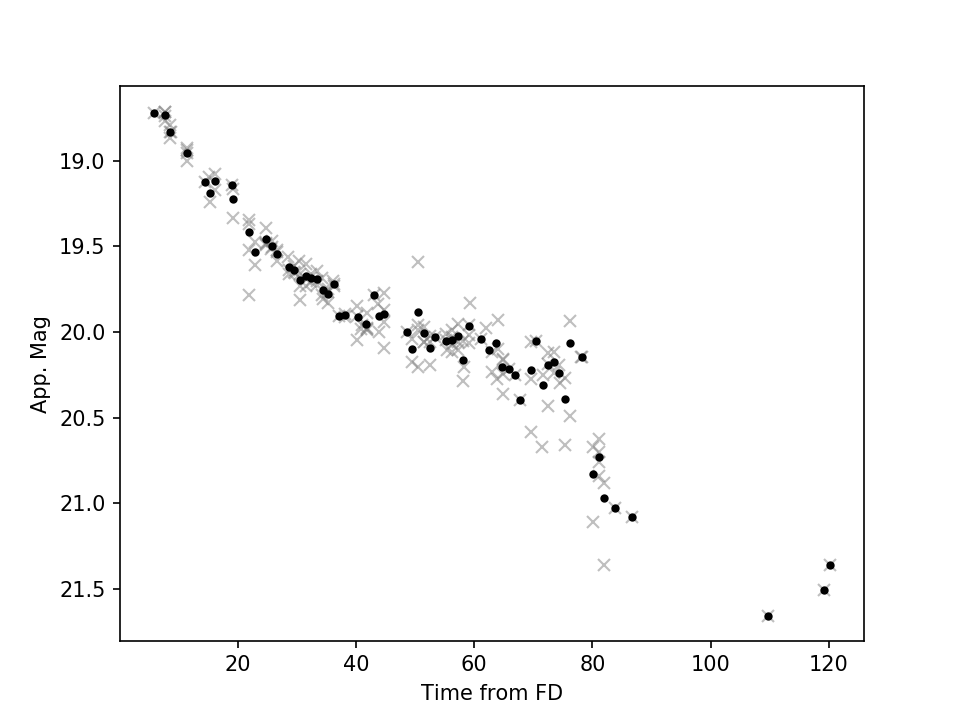

<IPython.core.display.Javascript object>


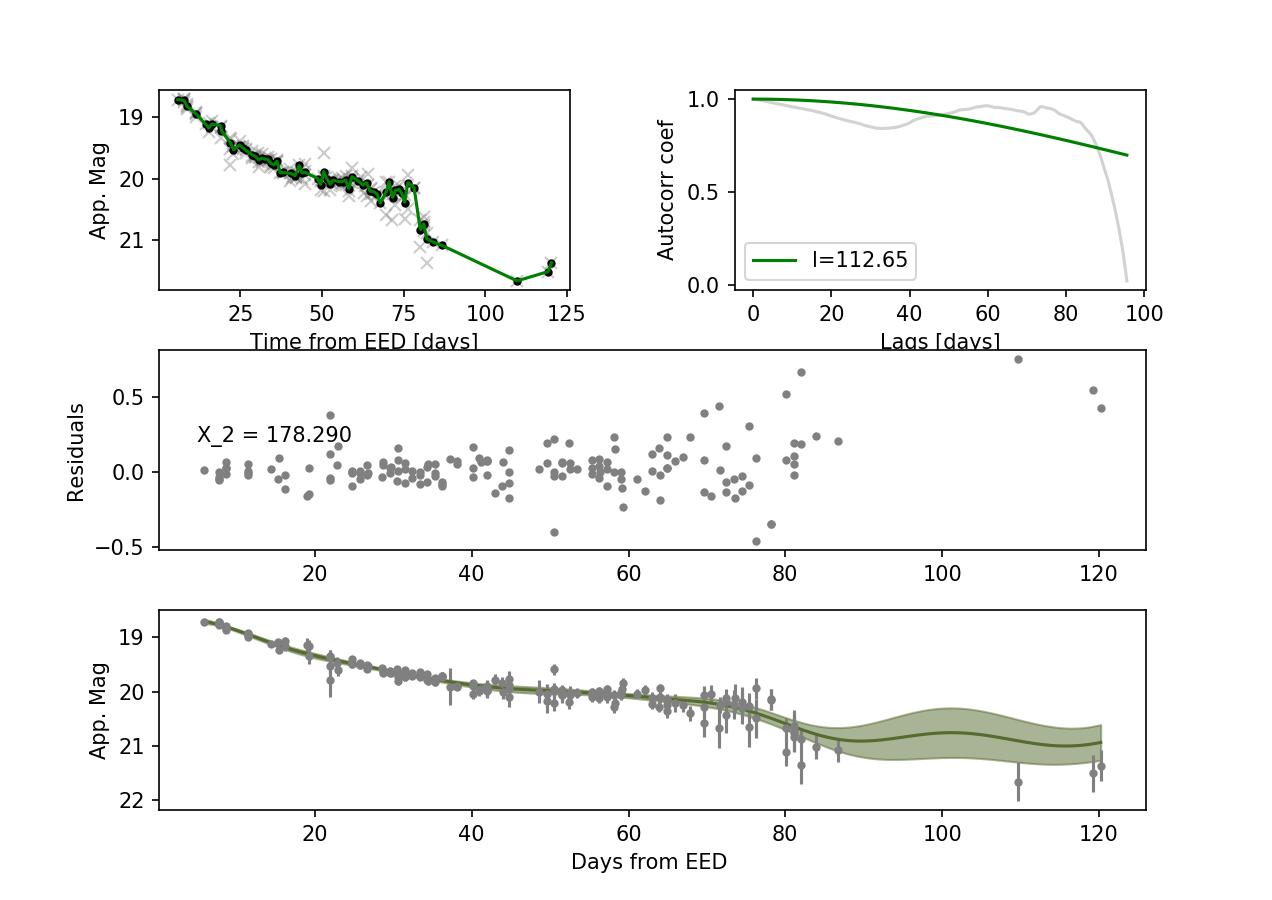

In [14]:
for candiname in subsamp_table['name'][1:2]:

    print(candiname)
    candi_peak = peak_mag_table[peak_mag_table['name']==candiname]

    lc   = ascii.read(forcedphot_maglc+f'{candiname}_mag_fp_lc_exzcorr.ascii')

    # remove non detections 
    lc   = lc[lc['mag']!=99.]

    # restrain light curve in time
    lc   = lc[lc['tfromexplo_zc']<=180]
    lc   = lc[lc['tfromexplo_zc']>=-1]

    # attention aux conditions de s'il existe observations dans le filtre, etc... 


    ############## RED BAND
    peak_r   = candi_peak[candi_peak['filter']=='r']
    t_peak_r = peak_r['pday'][0] 
        
    gp_lc_r = perform_gp_plot_by_parts(lc,'r', peak_time = t_peak_r, part = 'decline')

   
    ############## GREEN BAND
    
    peak_g   = candi_peak[candi_peak['filter']=='g']
    t_peak_g = peak_g['pday'][0]
    
    gp_lc_g = perform_gp_plot_by_parts(lc, 'g', peak_time = t_peak_g, part = 'decline')
        

    
    
#     gp_lc = hstack(gp_lc_r,gp_lc_g)



TO CHECK: 
typical length at early time? The early early time (with a big mag rise: faster tan 2 d kernel, there... )
t_break might be the better quantity to use here... obviously a better interpolation with a lot of data, the GP only smooth the interpolation...

try with peak mag/ 2 ...?

Definitely at early time there are different dynamic...